# *Problem Statement*



The goal of this project is to forecast sales across various products and locations for an Online grocery retailor Small Basket. Daily historical data is provided from January 2015 to December 2018. The objective is to forecast the unit_sales sold for each item across various locations from 1st January to 15th January.

The below notebook will load, merge, clean and explore the data.

### Business Perspective
The presnt Machine learning problem should draw the insights for the units_sold for the forecasted period. This, in turn, will help the business to keep its supply chain and delivery team intact for optimal inventory management during the forecast period.

(Thus to forecast unit-sales and to answer client's problem we draw various insights from past data, analyze requirements asked by business team would help to forecast. A ML would definitely help to draw conclusions about future data. Applying ML models might effectively forecast unit-sales with low MAPE(Mean Absolute Percentage Error)).

**Agenda**:

1.The agenda is to build a model that can accurately forecast sales for small basket across several locations and product categories.

2.Get some menaingful inights from the data and help operations team to understand:

    1.Which cluster will have highest sales for first 15 days of 2019?
    2.What are the top 10 selling items in the cluster?
    3.What is the rate of purchase per week for these items?

In [0]:
## Increase ram size.
a = []
while(1):
    a.append('1')

In [2]:
## Mount gmail account to google colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
## Get current working directory path.
!pwd

/content


In [1]:
## Import necessary libraries.

import numpy as np ## Numpy Library ( will use to convert data frame to array or creating array etc...).
import pandas as pd ## Pandas Library (will use to load data,create data frame...etc).
import os ## For connecting to machine to get path for reading/writing files.
import pickle as pkl ## For storing and reading pickle file.
import matplotlib.pyplot as plt ## For visualization.
import seaborn as sns ## For visualization.
import shutil ## Remove folder/files.
import datetime ## Date and time conversion.
from sklearn.preprocessing import LabelEncoder ## For label encoding(converting categorical values to label).

In [0]:
## Get current working directory.
os.getcwd()

'/content'

In [0]:
## Set  working directory.
os.chdir('/content/drive/My Drive')

In [5]:
## Check list of files in current directory.
!ls

 Adaboost_model		       unit_sales_ridge.csv
'Colab Notebooks'	       unit_sales_XGB.csv
 salesData		       unit_sales_XGB_ParamTuning_1.csv
 test.csv		       unit_sales_XGB_ParamTuning_2.csv
 testData		       unit_sales_XGB_ParamTuning_best.csv
 unit_sales_decisionTree.csv   unit_sales_XGB_ParamTuning.csv
 unit_sales_GB.csv	       xgb_model
 unit_sales_lasso.csv	       X_test
 unit_sales_predc1.csv	       X_train
 unit_sales_predc2.csv	       y_test
 unit_sales_randomForest.csv   y_train


## load data sets

In [0]:
## Load train data set.
salesData = pd.read_csv("train.csv",header='infer',sep=',')

In [0]:
## Load location data set.
locationData = pd.read_csv("location_details.csv",header='infer',sep=',')

In [0]:
## Load item data set.
itemData = pd.read_csv("item_details.csv",header='infer',sep=',')

In [0]:
## Load transaction data set.
trainTransaction = pd.read_csv("train_transactions.csv",header='infer',sep=',')

In [0]:
## Load test data set.
testData = pd.read_csv("test.csv",header='infer',sep=',')

## check statistics of all the data sets

In [0]:
## Train data set.

In [0]:
## Check dimensions of train data.
salesData.shape

(101688779, 5)

In [0]:
## Check first 5 records of train data.
salesData.head()

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,NaN
1,2015-01-01,location_25,item_105574,1.0,NaN
2,2015-01-01,location_25,item_105575,2.0,NaN
3,2015-01-01,location_25,item_108079,1.0,NaN
4,2015-01-01,location_25,item_108701,1.0,NaN


In [0]:
## Check last 5 records of train data.
salesData.tail()

,date,locationId,item_id,unit_sales,onpromotion
101688774,2018-12-31,location_54,item_2048381,6.0,True
101688775,2018-12-31,location_54,item_2048421,4.0,False
101688776,2018-12-31,location_54,item_2048471,10.0,False
101688777,2018-12-31,location_54,item_2048515,3.0,False
101688778,2018-12-31,location_54,item_2048674,1.0,False


In [0]:
## Check summary statistics of train data.
salesData.describe(include='all')

,date,locationId,item_id,unit_sales,onpromotion
count,101688779,101688779,101688779,1.016888e+08,80031128
unique,1456,53,3890,NaN,2
top,2018-02-28,location_44,item_314384,NaN,False
freq,193430,2878119,71407,NaN,74970155
mean,NaN,NaN,NaN,8.647890e+00,NaN
std,NaN,NaN,NaN,2.349533e+01,NaN
min,NaN,NaN,NaN,-1.537200e+04,NaN
25%,NaN,NaN,NaN,2.000000e+00,NaN
50%,NaN,NaN,NaN,4.000000e+00,NaN
75%,NaN,NaN,NaN,9.000000e+00,NaN


In [0]:
## Check column data types of train data.
salesData.dtypes

date            object
locationId      object
item_id         object
unit_sales     float64
onpromotion     object
dtype: object

In [0]:
## Check column names for train data.
salesData.columns

Index(['date', 'locationId', 'item_id', 'unit_sales', 'onpromotion'], dtype='object')

In [0]:
## Check index range for train data.
salesData.index

RangeIndex(start=0, stop=101688779, step=1)

In [0]:
## Check missing percentage values for train data.
missing_values = (salesData.isna().sum() /len(salesData)).round(4) * 100 
missing_values.sort_values(ascending = False)

onpromotion    21.3
unit_sales      0.0
item_id         0.0
locationId      0.0
date            0.0
dtype: float64

In [0]:
## Location data set.

In [0]:
## Check dimensions of location data.
locationData.shape

(54, 5)

In [0]:
## Check first 5 records of location data.
locationData.head()

,location_id,city,state,type,cluster
0,location_1,Bengaluru,Karnataka,D,13
1,location_2,Bengaluru,Karnataka,D,13
2,location_3,Bengaluru,Karnataka,D,8
3,location_4,Bengaluru,Karnataka,D,9
4,location_5,Delhi,NCR,D,4


In [0]:
## Check last 5 records of location data.
locationData.tail()

,location_id,city,state,type,cluster
49,location_50,Gurgaon,Haryana,A,14
50,location_51,Mumbai,Maharashtra,A,17
51,location_52,Chennai,Tamil Nadu,A,11
52,location_53,Chennai,Tamil Nadu,D,13
53,location_54,Patna,Bihar,C,3


In [0]:
## Check summary statistics of location data.
locationData.describe(include='all')

,location_id,city,state,type,cluster
count,54,54,54,54,54.000000
unique,54,22,13,5,NaN
top,location_45,Bengaluru,Karnataka,D,NaN
freq,1,18,19,18,NaN
mean,NaN,NaN,NaN,NaN,8.481481
std,NaN,NaN,NaN,NaN,4.693395
min,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,8.500000
75%,NaN,NaN,NaN,NaN,13.000000


In [0]:
## Check column data types of location.
locationData.dtypes

location_id    object
city           object
state          object
type           object
cluster         int64
dtype: object

In [0]:
## Check column  names of location data.
locationData.columns

Index(['location_id', 'city', 'state', 'type', 'cluster'], dtype='object')

In [0]:
## Check index range for location data.
locationData.index

RangeIndex(start=0, stop=54, step=1)

In [0]:
## Check missing percentage values for location data.
missing_values = (locationData.isna().sum() /len(locationData)).round(4) * 100
missing_values.sort_values(ascending = False)

cluster        0.0
type           0.0
state          0.0
city           0.0
location_id    0.0
dtype: float64

In [0]:
## Item data set.

In [0]:
## Check dimensions of item data.
itemData.shape

(4100, 4)

In [0]:
## Check first 5 records of item data.
itemData.head()

,item_id,category_of_item,class,perishable
0,item_96995,grocery_items,class_1093,0
1,item_99197,grocery_items,class_1067,0
2,item_103501,cleaning_utilities,class_3008,0
3,item_103520,grocery_items,class_1028,0
4,item_103665,baked_items / bread_based,class_2712,1


In [0]:
## Check last 5 records of item data.
itemData.tail()

,item_id,category_of_item,class,perishable
4095,item_2132318,grocery_items,class_1002,0
4096,item_2132945,grocery_items,class_1026,0
4097,item_2132957,grocery_items,class_1068,0
4098,item_2134058,beverages,class_1124,0
4099,item_2134244,other_bevrages,class_1364,0


In [0]:
## Check summary statistics of item data.
itemData.describe(include='all')

,item_id,category_of_item,class,perishable
count,4100,4100,4100,4100.000000
unique,4100,30,337,NaN
top,item_818588,grocery_items,class_1016,NaN
freq,1,1334,133,NaN
mean,NaN,NaN,NaN,0.240488
std,NaN,NaN,NaN,0.427432
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,0.000000


In [0]:
## Check column data types of item data.
itemData.dtypes

item_id             object
category_of_item    object
class               object
perishable           int64
dtype: object

In [0]:
## Check column names of item data.
itemData.columns

Index(['item_id', 'category_of_item', 'class', 'perishable'], dtype='object')

In [0]:
## Check index range of item data.
itemData.index

RangeIndex(start=0, stop=4100, step=1)

In [0]:
## Check missing percentage values for item data.
missing_values = (itemData.isna().sum() /len(itemData)).round(4) * 100 
missing_values.sort_values(ascending = False)

perishable          0.0
class               0.0
category_of_item    0.0
item_id             0.0
dtype: float64

In [0]:
## Transaction data set

In [0]:
## Check dimensions of transaction data.
trainTransaction.shape

(71391, 3)

In [0]:
## Check first 5 records of transaction data.
trainTransaction.head()

,date,location_identifier,transactions
0,2015-01-01,location_25,770
1,2015-01-02,location_1,2111
2,2015-01-02,location_2,2358
3,2015-01-02,location_3,3487
4,2015-01-02,location_4,1922


In [0]:
## Check last 5 records of transaction data.
trainTransaction.tail()

,date,location_identifier,transactions
71386,2018-12-31,location_49,4051
71387,2018-12-31,location_50,3388
71388,2018-12-31,location_51,2742
71389,2018-12-31,location_53,2718
71390,2018-12-31,location_54,1647


In [0]:
## Check summary statistics of transaction data.
trainTransaction.describe(include='all')

,date,location_identifier,transactions
count,71391,71391,71391.000000
unique,1454,53,NaN
top,2018-02-28,location_38,NaN
freq,106,1452,NaN
mean,NaN,NaN,1701.598367
std,NaN,NaN,968.125835
min,NaN,NaN,5.000000
25%,NaN,NaN,1049.000000
50%,NaN,NaN,1397.000000
75%,NaN,NaN,2100.000000


In [0]:
## Check column data types of transaction data.
trainTransaction.dtypes

date                   object
location_identifier    object
transactions            int64
dtype: object

In [0]:
## Check column names of transaction data.
trainTransaction.columns

Index(['date', 'location_identifier', 'transactions'], dtype='object')

In [0]:
## Check index range of transaction data.
trainTransaction.index

RangeIndex(start=0, stop=71391, step=1)

In [0]:
## Check missing percentage values for transaction data.
missing_values = (trainTransaction.isna().sum() /len(trainTransaction)).round(4) * 100 
missing_values.sort_values(ascending = False)

transactions           0.0
location_identifier    0.0
date                   0.0
dtype: float64

In [0]:
## Test data set.

In [0]:
## Check dimensions of test data.
testData.shape

(1482295, 5)

In [0]:
## Check summary statistics of test data.
testData.describe(include='all')

,id,date,locationId,item_id,onpromotion
count,1.482295e+06,1482295,1482295,1482295,1482295
unique,NaN,15,53,3828,2
top,NaN,2019-01-02,location_44,item_222879,False
freq,NaN,114225,40028,742,1301444
mean,7.411470e+05,NaN,NaN,NaN,NaN
std,4.279019e+05,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN
25%,3.705735e+05,NaN,NaN,NaN,NaN
50%,7.411470e+05,NaN,NaN,NaN,NaN
75%,1.111720e+06,NaN,NaN,NaN,NaN


In [0]:
## Check column data types of test data.
testData.dtypes

id              int64
date           object
locationId     object
item_id        object
onpromotion      bool
dtype: object

In [0]:
## Check column names of test data.
testData.columns

Index(['id', 'date', 'locationId', 'item_id', 'onpromotion'], dtype='object')

In [0]:
## Check index range for test data.
testData.index

RangeIndex(start=0, stop=1482295, step=1)

In [0]:
## Check missing percentage values for test data.
missing_values = (testData.isna().sum() /len(testData)).round(4) * 100 
missing_values.sort_values(ascending = False)

onpromotion    0.0
item_id        0.0
locationId     0.0
date           0.0
id             0.0
dtype: float64

## data type conversions

In [0]:
## Convert to object type to category datatype.
def dtypeConversion(df):  
  for i in df.select_dtypes('object'):
    df[i]=df[i].astype('category')

In [0]:
## Convert train data object data types to category.
dtypeConversion(salesData)

In [0]:
## Check column data types of train data.
salesData.dtypes

date           category
locationId     category
item_id        category
unit_sales      float64
onpromotion    category
dtype: object

In [0]:
## Convert train data date,onpromotion column data types to datetime,bool respectively.
salesData['date']=salesData['date'].astype('datetime64[ns]')
salesData['onpromotion']=salesData['onpromotion'].astype('bool',errors='ignore')

In [0]:
## Check column data types of train data.
salesData.dtypes

date           datetime64[ns]
locationId           category
item_id              category
unit_sales            float64
onpromotion          category
dtype: object

In [0]:
## Convert location data object data types to category.
dtypeConversion(locationData)

In [0]:
## Check column data types of location data.
locationData.dtypes

location_id    category
city           category
state          category
type           category
cluster           int64
dtype: object

In [0]:
## Convert item data object data types to category.
dtypeConversion(itemData)

In [0]:
## Check column data types of item data.
itemData.dtypes

item_id             category
category_of_item    category
class               category
perishable             int64
dtype: object

In [0]:
## Convert item data persishable column data type to unit8.
itemData['perishable']=itemData['perishable'].astype('uint8',errors='ignore')

In [0]:
## Check column data types of item data.
itemData.dtypes

item_id             category
category_of_item    category
class               category
perishable             uint8
dtype: object

In [0]:
## Convert transaction data object data types to category.
dtypeConversion(trainTransaction)

In [0]:
## Check column data types of transaction data.
trainTransaction.dtypes

date                   category
location_identifier    category
transactions              int64
dtype: object

In [0]:
## Convert transaction data, date column data type to datetime.
trainTransaction['date']=trainTransaction['date'].astype('datetime64[ns]')

In [0]:
## Check column data types of transaction data.
trainTransaction.dtypes

date                   datetime64[ns]
location_identifier          category
transactions                    int64
dtype: object

In [0]:
## Convert test data object data types to category.
dtypeConversion(testData)

In [0]:
## Check column data types of test data.
testData.dtypes

id                int64
date           category
locationId     category
item_id        category
onpromotion        bool
dtype: object

In [0]:
## Convert test data, date column category data type to datetime.
testData['date']=testData['date'].astype('datetime64[ns]')

In [0]:
## Check column data types of test data.
testData.dtypes

id                      int64
date           datetime64[ns]
locationId           category
item_id              category
onpromotion              bool
dtype: object

## Dump and load pickle files 

In [0]:
## Advantages of pickle file compared to csv file is,column data types won't change.

## Set path for pickle files.
PATH='/content/drive/My Drive/pickle_folder'

## If path is exist then delete the folder/filer in that path.
if os.path.exists(PATH):
  shutil.rmtree(PATH)

## Create a directory.
os.mkdir(PATH)

In [0]:
## Dump pickle files.

In [0]:
## Dump a pickle into specified path.
def pickleFileDump(fileName,df):
  outfile=open(fileName,'wb')
  pkl.dump(df,outfile)
  outfile.close()

In [0]:
## Dump train data into pickle.
pickleFileDump('salesData',salesData)

In [0]:
## Dump location data into pickle.
pickleFileDump('locationData',locationData)

In [0]:
## Dump item data into pickle.
pickleFileDump('itemData',itemData)

In [0]:
## Dump transaction data into pickle.
pickleFileDump('transactionData',trainTransaction)

In [0]:
## Dump test data into pickle.
pickleFileDump('testData',testData)

In [0]:
## Read pickle files.

In [0]:
## Read pickle from specified file.
def readPickleFile(fileName):
  infile=open(fileName,'rb')
  df = pkl.load(infile)
  infile.close()
  return df

In [0]:
## Read train data from pickle.
salesData = readPickleFile('salesData')

In [0]:
## Check column data types of train data.
salesData.dtypes

date           datetime64[ns]
locationId           category
item_id              category
unit_sales            float64
onpromotion              bool
dtype: object

In [0]:
## Check shapes of train data.
salesData.shape

(101678735, 5)

In [0]:
## Check null values for train data.
salesData.isna().sum()

date           0
locationId     0
item_id        0
unit_sales     0
onpromotion    0
dtype: int64

In [0]:
## Read location data from pickle.
locationData = readPickleFile('locationData')

In [0]:
## Check column data types of location data.
locationData.dtypes

location_id    category
city           category
state          category
type           category
cluster           int64
dtype: object

In [0]:
## Check dimensions of location data.
locationData.shape

(54, 5)

In [0]:
## Read item data from pickle.
itemData = readPickleFile('itemData')

In [0]:
## Check column data types of item data.
itemData.dtypes

item_id             category
category_of_item    category
class               category
perishable             uint8
dtype: object

In [0]:
## Check dimenions of item data.
itemData.shape

(4100, 4)

In [0]:
## Read transaction data from pickle.
transactionData = readPickleFile('transactionData')

In [0]:
## Check column data types of transaction data.
transactionData.dtypes

date                   datetime64[ns]
location_identifier          category
transactions                    int64
dtype: object

In [0]:
## Check dimensions of transaction data.
transactionData.shape

(71391, 3)

In [0]:
## Read test data from pickle.
testData = readPickleFile('testData')

In [0]:
## Check column data types of test data.
testData.dtypes

id                      int64
date           datetime64[ns]
locationId           category
item_id              category
onpromotion              bool
dtype: object

In [0]:
## Check dimensions of test data.
testData.shape

(1482295, 5)

In [0]:
## Check null values of test data.
testData.isna().sum()

id             0
date           0
locationId     0
item_id        0
onpromotion    0
dtype: int64

## EDA on single data frames

In [0]:
## Check number of sales per day.
salesAggrigation=salesData.groupby('date').agg({
    'unit_sales':'sum'
})

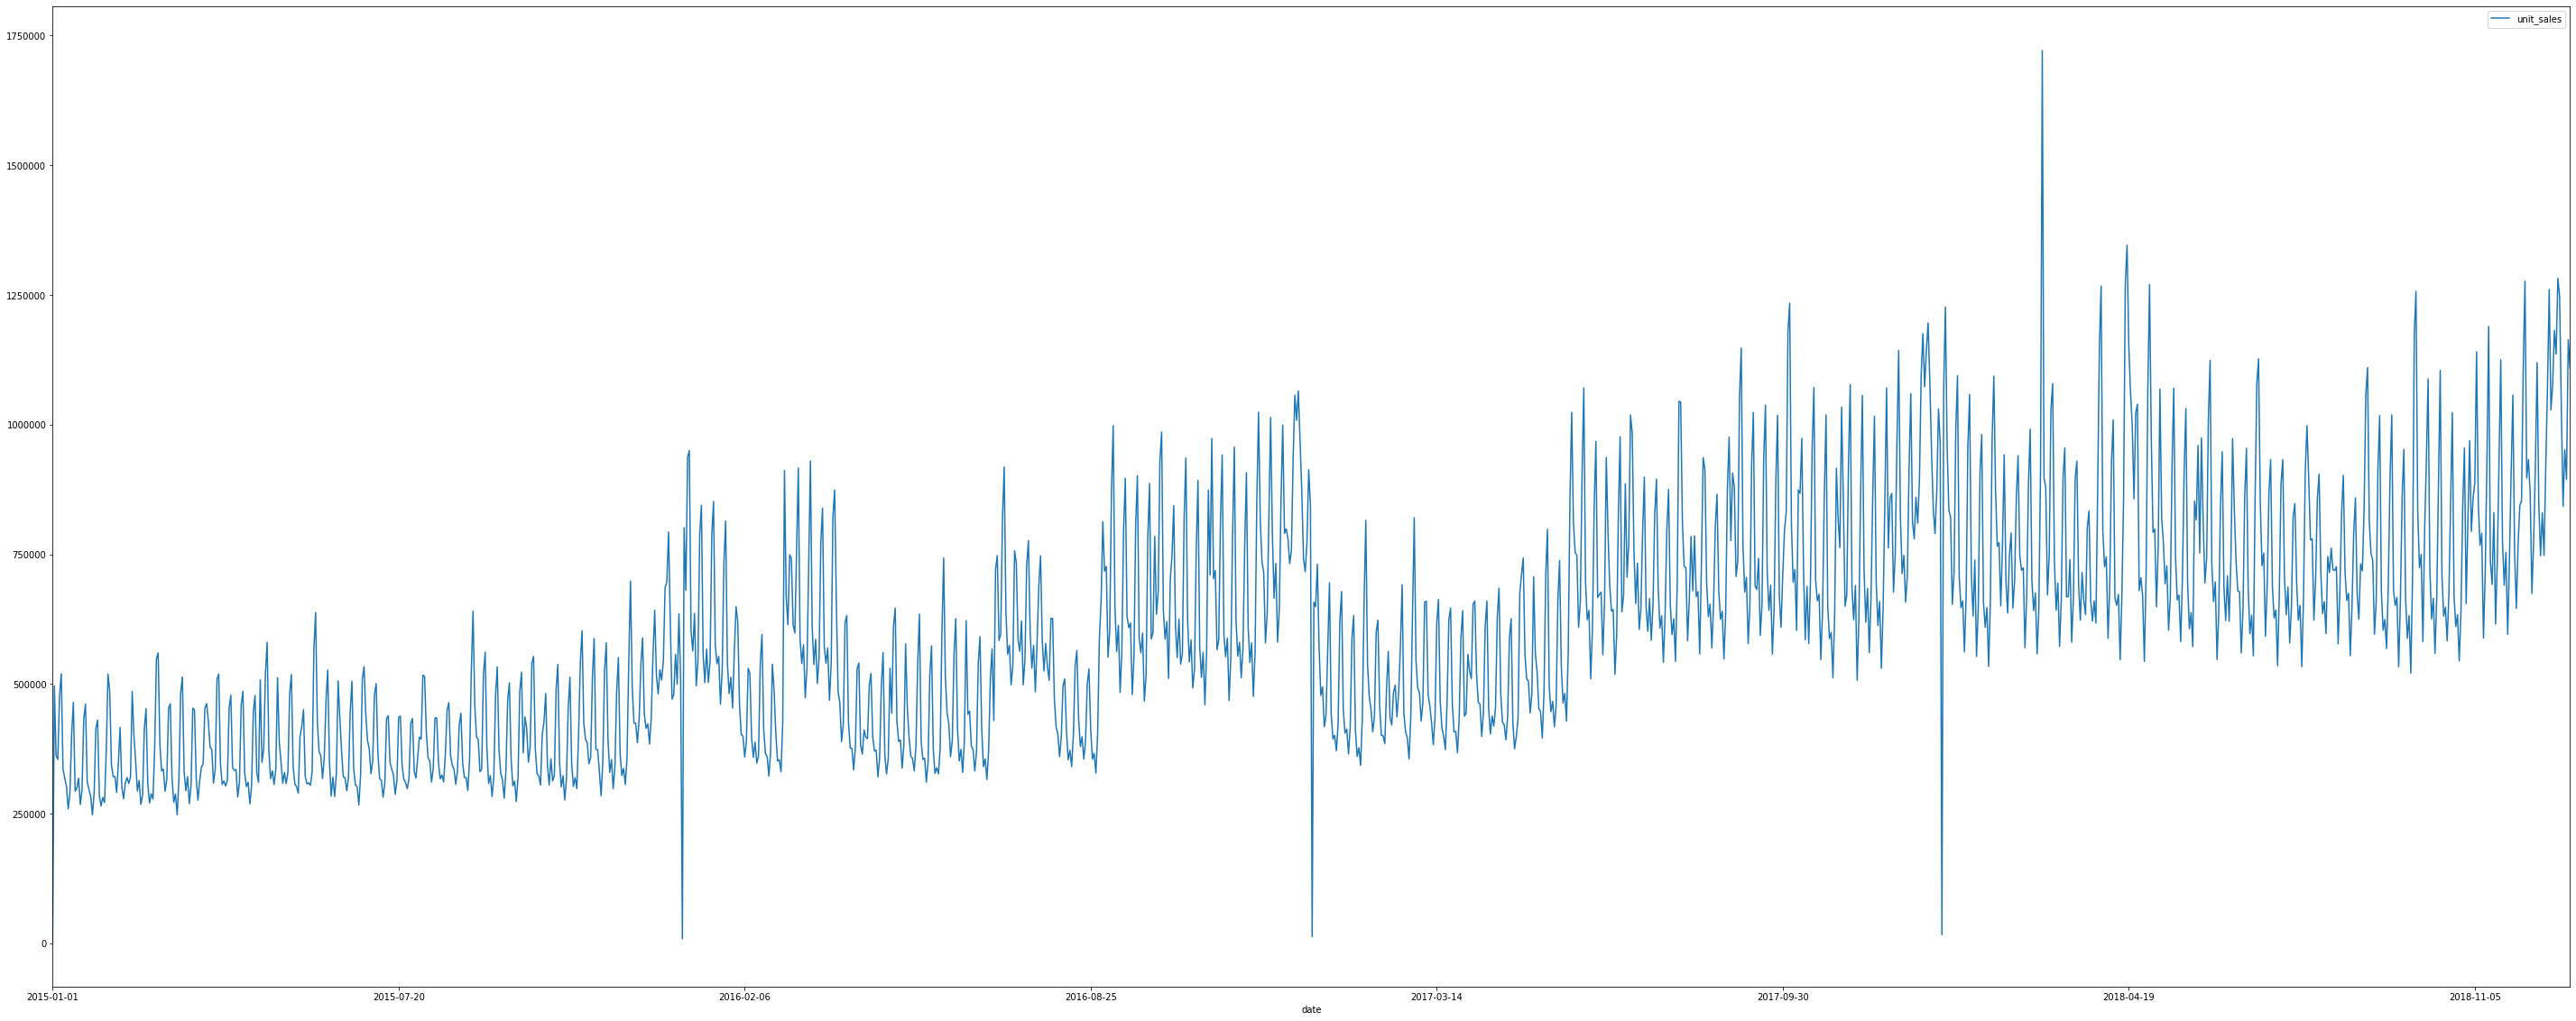

In [0]:
fig, ax = plt.subplots(figsize=(50, 20))
salesAggrigation.plot(ax=ax)
fig.show()

In [0]:
## Check number of sales per location.
salesAggrigation=salesData.groupby('locationId').agg({
    'unit_sales':'sum'
})

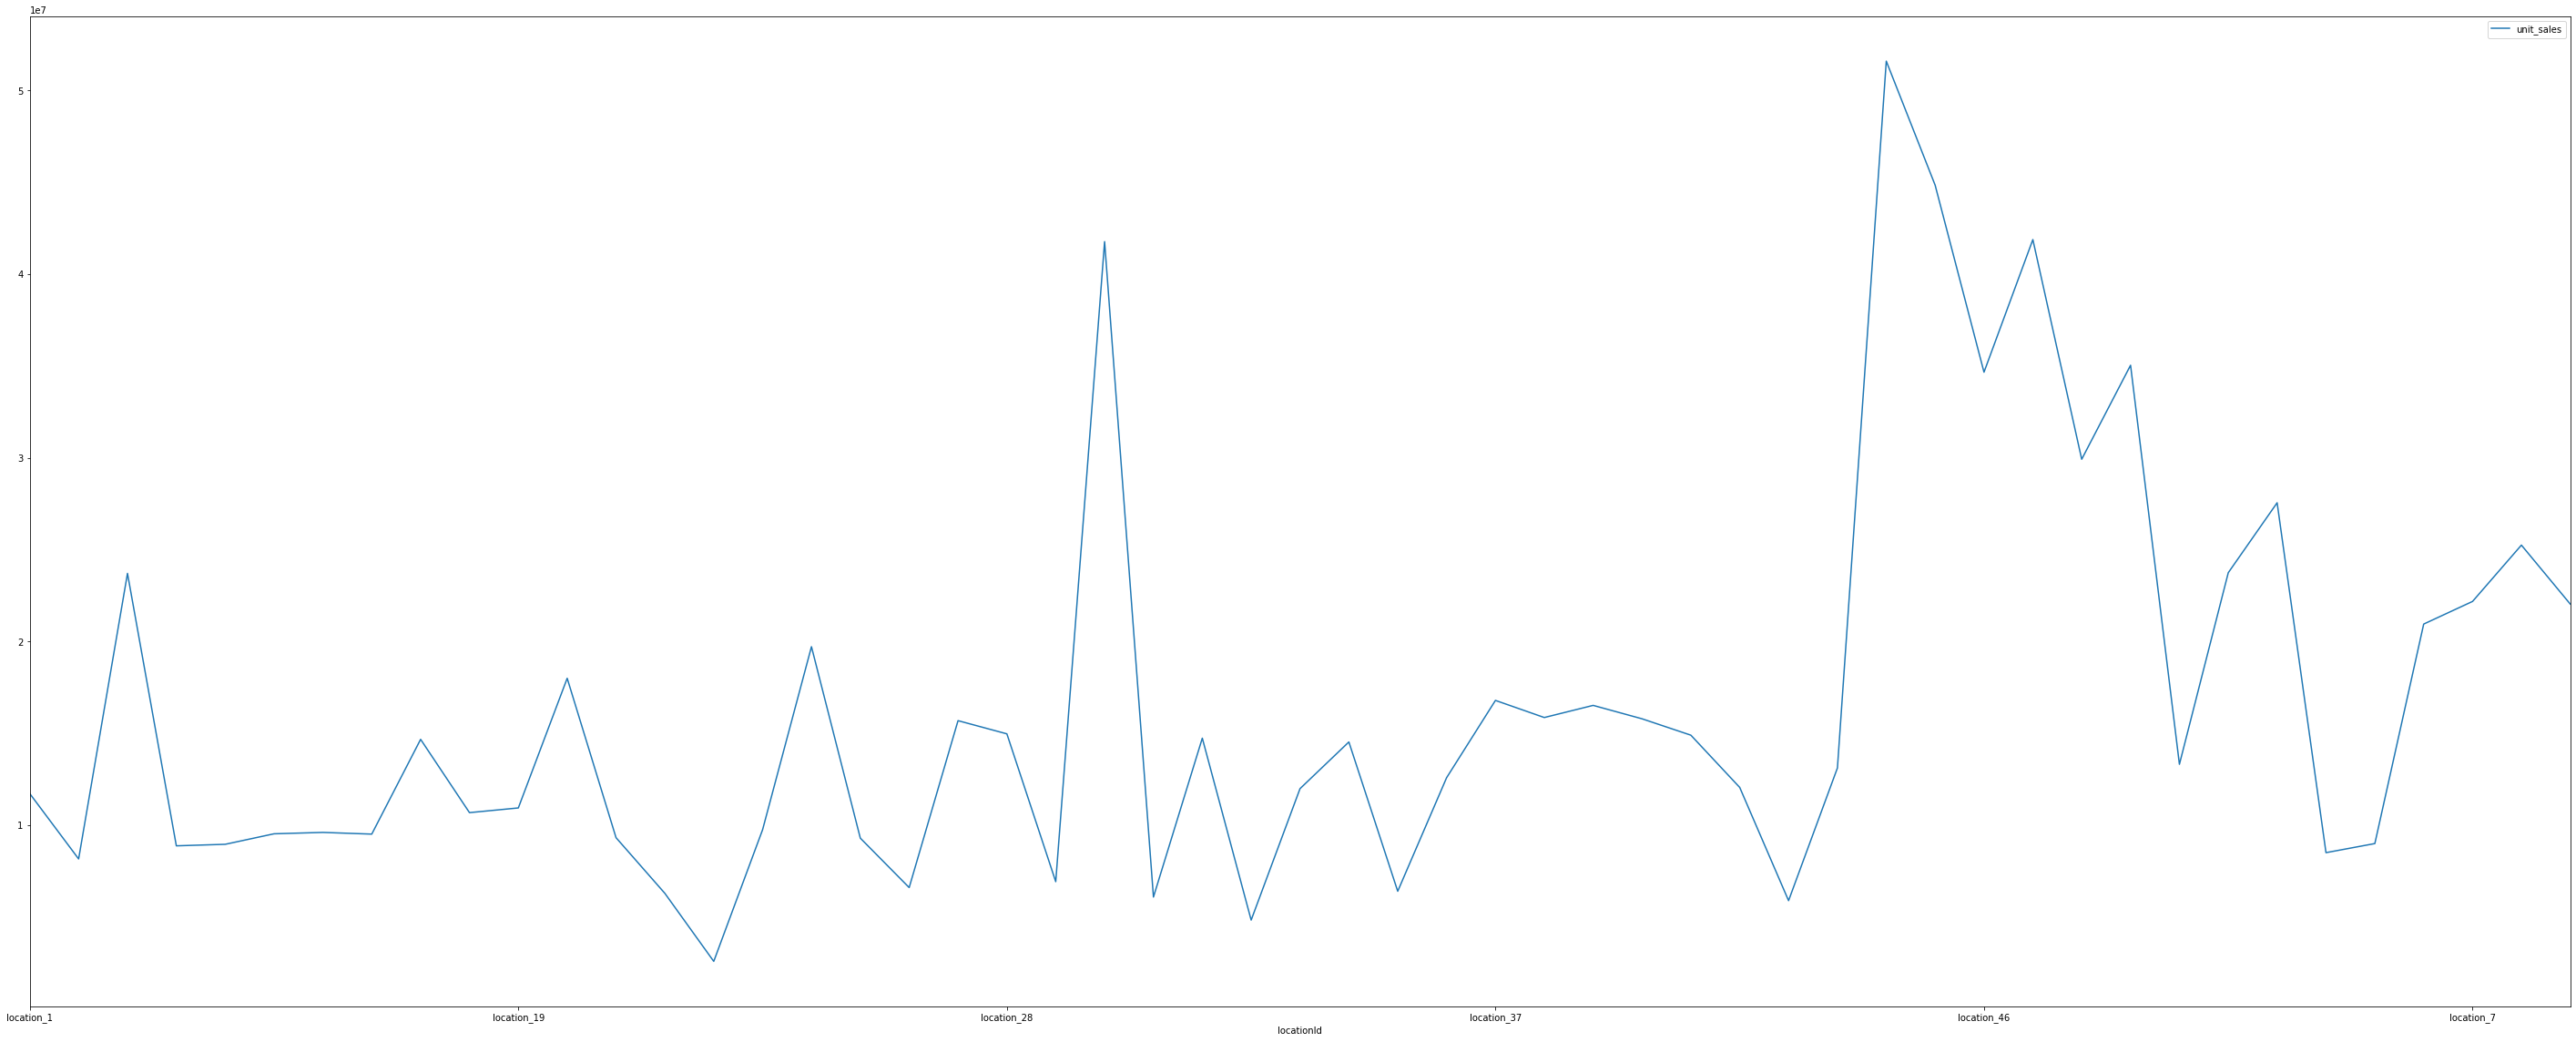

In [0]:
fig, ax = plt.subplots(figsize=(50, 20))
salesAggrigation.plot(ax=ax)
fig.show()

In [0]:
salesAggrigation

,unit_sales
locationId,
location_1,1.170849e+07
location_10,8.151633e+06
location_11,2.370083e+07
location_12,8.865106e+06
location_13,8.948093e+06
location_14,9.520629e+06
location_15,9.595803e+06
location_16,9.503031e+06
location_17,1.466371e+07


<Figure size 864x504 with 0 Axes>

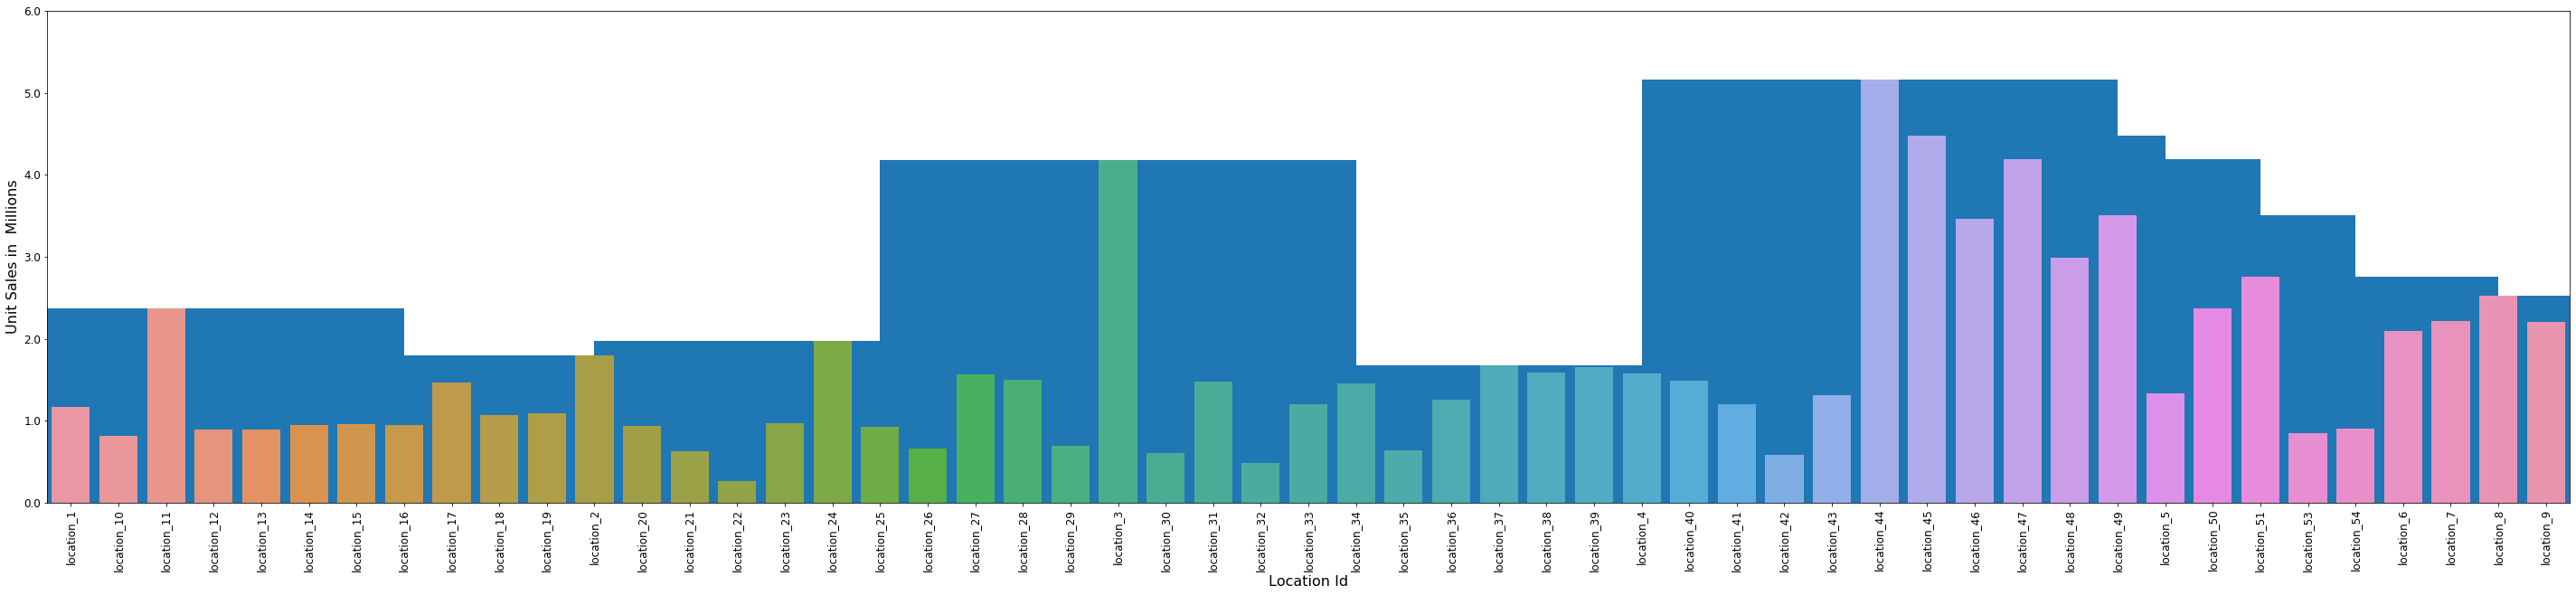

In [0]:
## Set figure size to 12, 7.
plt.figure(figsize=(12,7))
## seaborn bar plot.
salesAggrigation.plot(kind='bar', legend=False, width=10, figsize=(50,10))
sns.barplot(x=salesAggrigation.index,y=salesAggrigation.unit_sales,data=salesAggrigation)
## xticks fontsize to 12.
plt.xticks(fontsize=12)
## ytics fontsize also to 24 but get loc and labels .
loc,labels=plt.yticks(fontsize=12)
## Set loc and labels as loc, loc/1e9 (lables be just divided by 1e9 to scale by billions).
plt.yticks(loc,loc/1e7)
## Set xlabel as 'Continents' with fontsize 16.
plt.xlabel('Location Id',fontsize=16)
## Set ylabel as Population Billions to fontsize 16.
plt.ylabel('Unit Sales in  Millions',fontsize=16)
## Show plot.
plt.show()

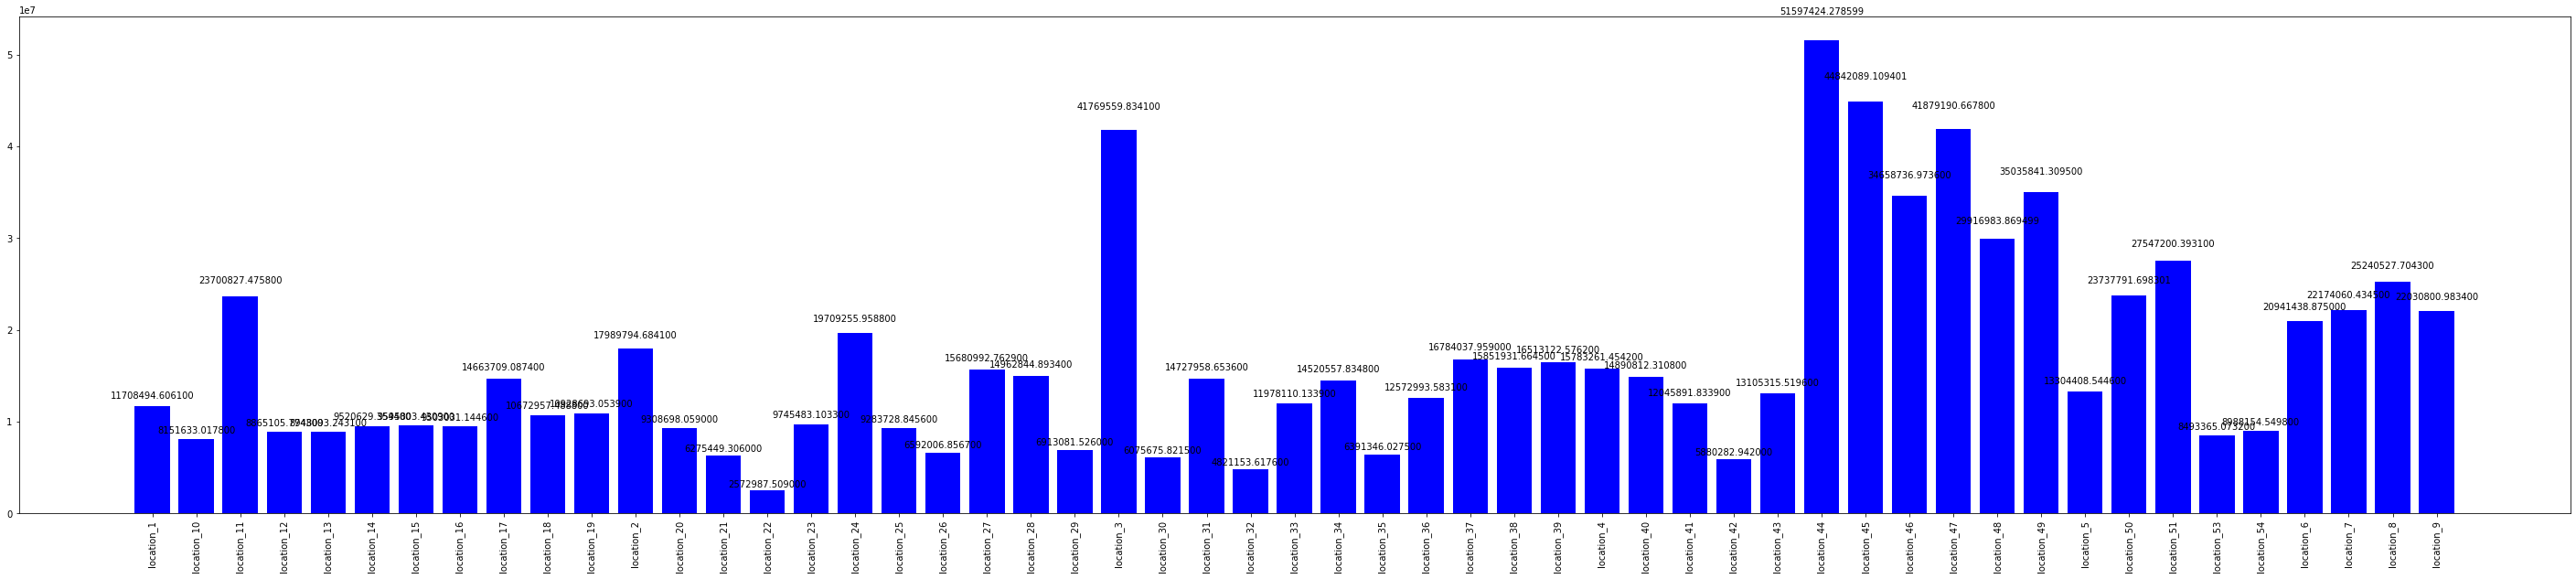

In [0]:
## Plot numbers of sales per location.
fig, ax = plt.subplots(figsize=(50,10))
rects1 = ax.bar(salesAggrigation.index, salesAggrigation.unit_sales, color='b')
plt.xticks(rotation='vertical')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()


In [0]:
## Number of sales per item.
salesAggrigation=salesData.groupby('item_id').agg({
    'unit_sales':'sum'
})

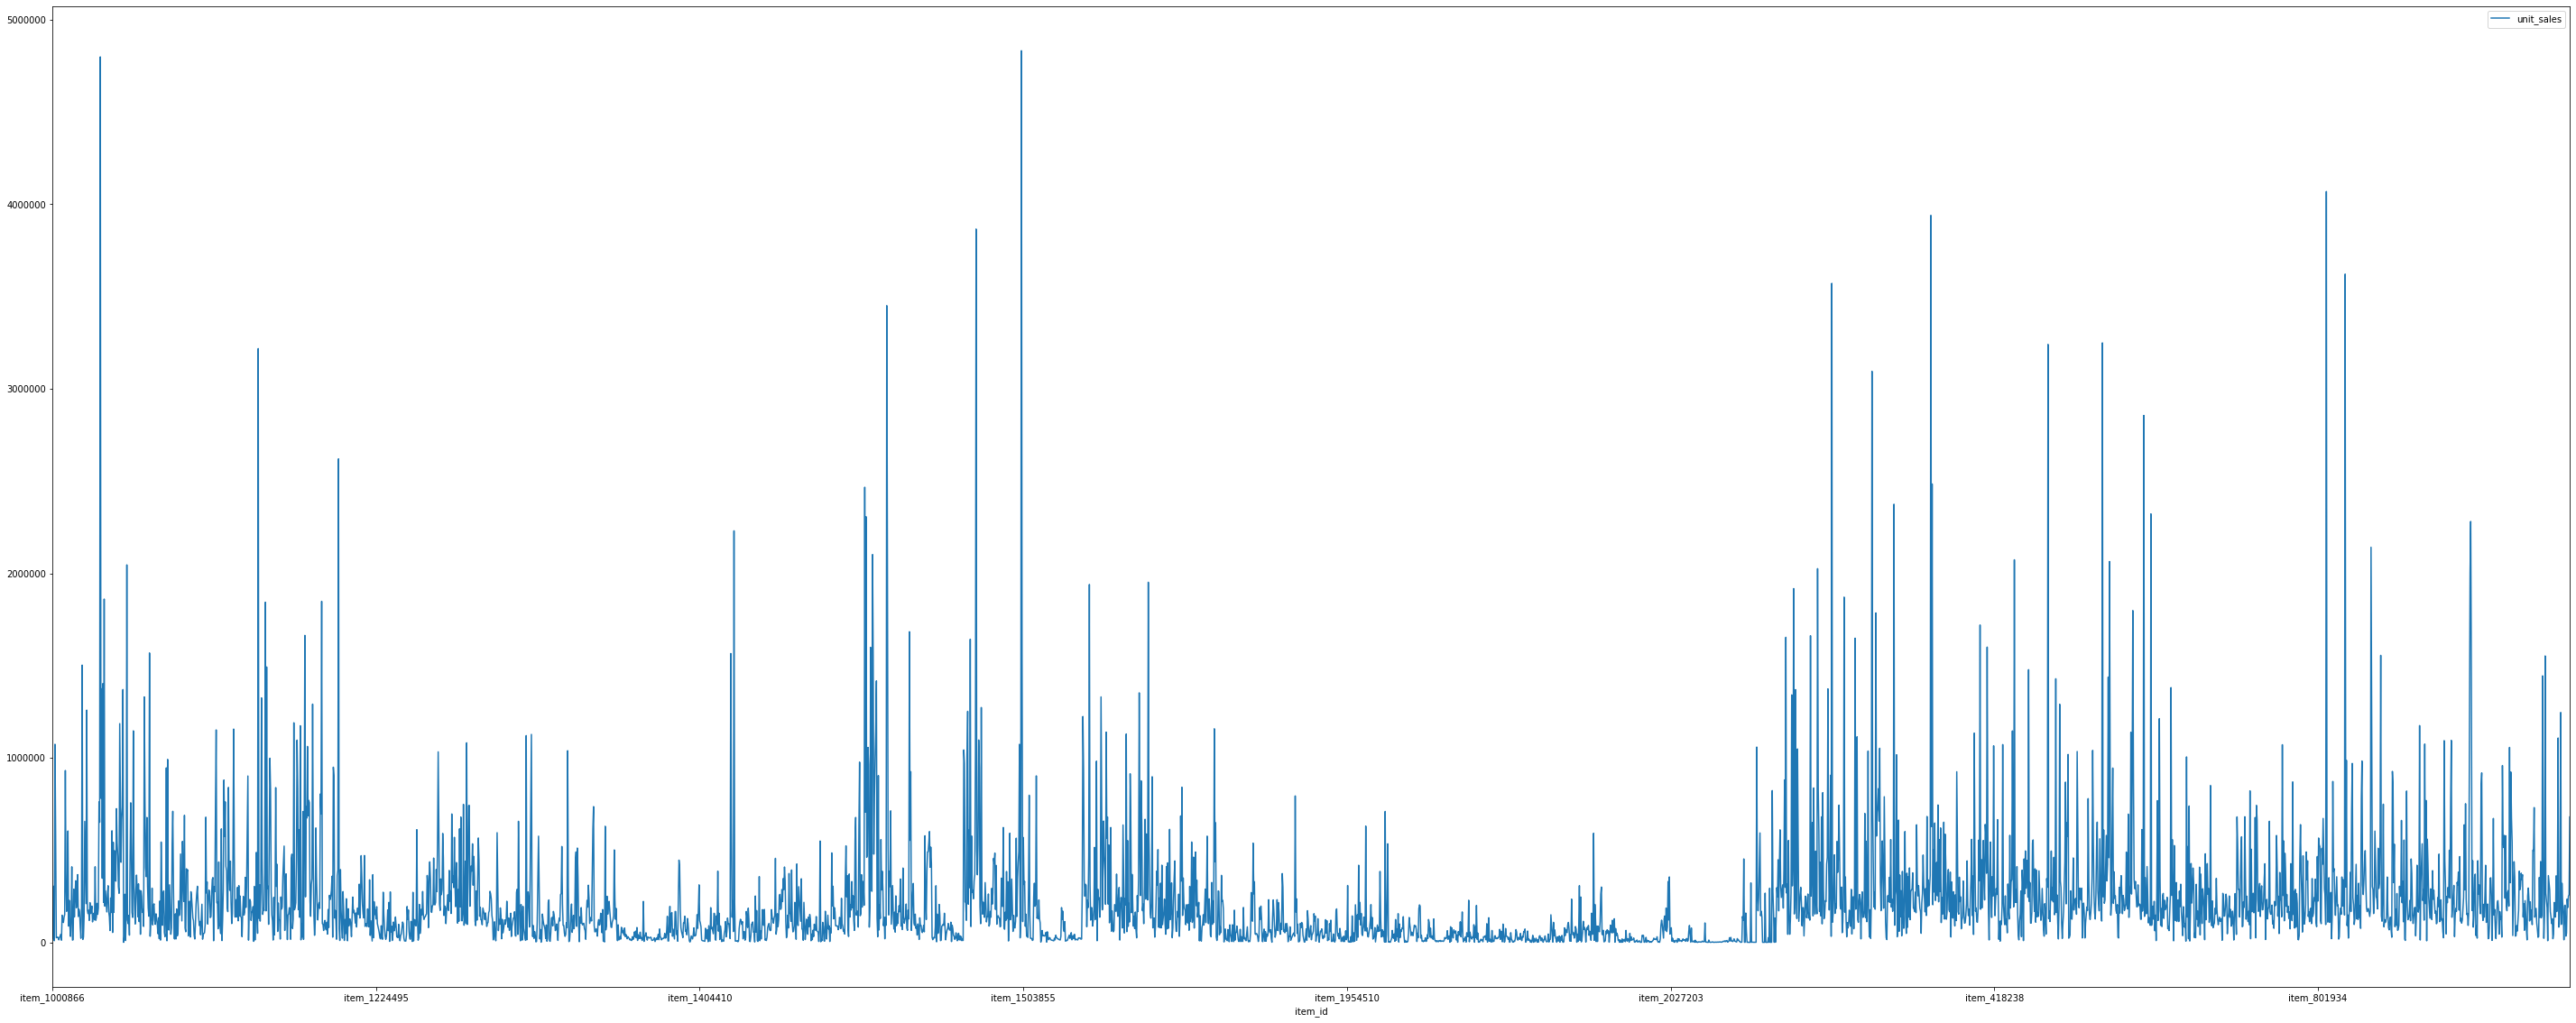

In [0]:
fig, ax = plt.subplots(figsize=(50, 20))
salesAggrigation.plot(ax=ax)
fig.show()

In [0]:
## Number of items per category.
salesAggrigation=itemData.groupby(['category_of_item']).agg({
    'item_id':'count'
})

In [0]:
salesAggrigation

,item_id
category_of_item,
baked_items / bread_based,134
beauty_products,19
beverages,613
cleaning_utilities,446
dairy_items,242
deli_items,91
eggs,41
frozen_food,55
grocery_items,1334


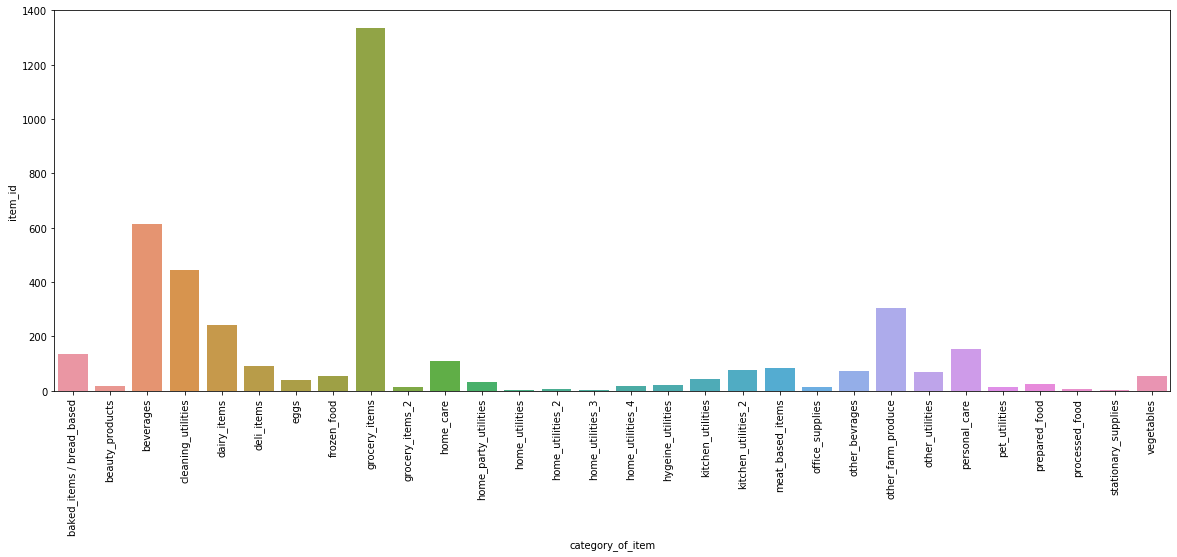

In [0]:
## Numer of items per category.
#salesAggrigation.plot(kind='bar', legend=False, width=0.8, figsize=(20,7))
sns.barplot(x=salesAggrigation.index,y=salesAggrigation.item_id,data=salesAggrigation)

In [0]:
## Number of items per class.

In [0]:
salesAggrigation=itemData.groupby(['class']).agg({
    'item_id':'count'
})

In [0]:
salesAggrigation

,item_id
class,
class_1002,31
class_1003,4
class_1004,39
class_1005,1
class_1006,12
...,...
class_6960,2
class_7002,6
class_7016,4


In [0]:
## Get unique values for train data.
salesData.nunique()

date             1456
locationId         53
item_id          3890
unit_sales     244090
onpromotion         2
dtype: int64

In [0]:
## Get unique values for test data.
testData.nunique()

id             1482295
date                15
locationId          53
item_id           3828
onpromotion          2
dtype: int64

## Merge the data sets

In [0]:
## Merge train with item data set based on item id column.
dataframe1 = salesData.merge(itemData, how='left', left_on = 'item_id', right_on= 'item_id')

In [0]:
## Check first 5 records of merged data.
dataframe1.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable
0,2015-01-01,location_25,item_103665,7.0,NaN,baked_items / bread_based,class_2712,1
1,2015-01-01,location_25,item_105574,1.0,NaN,grocery_items,class_1045,0
2,2015-01-01,location_25,item_105575,2.0,NaN,grocery_items,class_1045,0
3,2015-01-01,location_25,item_108079,1.0,NaN,grocery_items,class_1030,0
4,2015-01-01,location_25,item_108701,1.0,NaN,deli_items,class_2644,1


In [0]:
## Dump merged data frame into pickle.
pickleFileDump('dataframe1',dataframe1)

In [0]:
## Read dataframe1 from pickle.
dataframe1 = readPickleFile('dataframe1')

In [0]:
## Merge dataframe1 with location data based on location id column.
dataframe2 = dataframe1.merge(locationData, how = 'left', left_on= 'locationId', right_on= 'location_id')

In [0]:
## Dump dataframe2 into pickle.
pickleFileDump('dataframe2',dataframe2)

In [0]:
## Check list of files in current working directory.
!ls

'Colab Notebooks'       item_details.csv       train.csv
 dataframe1	        locationData	       train_transactions.csv
 dataframe2	        location_details.csv   transactionData
'Getting started.pdf'   pickle_folder
 itemData	        salesData


In [0]:
## Check first 5 records of dataframe2.
dataframe2.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,location_id,city,state,type,cluster
0,2015-01-01,location_25,item_103665,7.0,NaN,baked_items / bread_based,class_2712,1,location_25,Kanpur,Uttar Pradesh,D,1
1,2015-01-01,location_25,item_105574,1.0,NaN,grocery_items,class_1045,0,location_25,Kanpur,Uttar Pradesh,D,1
2,2015-01-01,location_25,item_105575,2.0,NaN,grocery_items,class_1045,0,location_25,Kanpur,Uttar Pradesh,D,1
3,2015-01-01,location_25,item_108079,1.0,NaN,grocery_items,class_1030,0,location_25,Kanpur,Uttar Pradesh,D,1
4,2015-01-01,location_25,item_108701,1.0,NaN,deli_items,class_2644,1,location_25,Kanpur,Uttar Pradesh,D,1


In [0]:
## Read dataframe2 from pickle.
dataframe2 = readPickleFile('dataframe2')

In [0]:
## Merge dataframe2 with train_transaction based on date,location id columns.
dataframe3 = dataframe2.merge(transactionData, how='left', left_on=['date', 'locationId'], right_on = ['date', 'location_identifier'])

In [0]:
## Check first 5 records of dataframe3.
dataframe3.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,location_id,city,state,type,cluster,location_identifier,transactions
0,2015-01-01,location_25,item_103665,7.0,NaN,baked_items / bread_based,class_2712,1,location_25,Kanpur,Uttar Pradesh,D,1,location_25,770.0
1,2015-01-01,location_25,item_105574,1.0,NaN,grocery_items,class_1045,0,location_25,Kanpur,Uttar Pradesh,D,1,location_25,770.0
2,2015-01-01,location_25,item_105575,2.0,NaN,grocery_items,class_1045,0,location_25,Kanpur,Uttar Pradesh,D,1,location_25,770.0
3,2015-01-01,location_25,item_108079,1.0,NaN,grocery_items,class_1030,0,location_25,Kanpur,Uttar Pradesh,D,1,location_25,770.0
4,2015-01-01,location_25,item_108701,1.0,NaN,deli_items,class_2644,1,location_25,Kanpur,Uttar Pradesh,D,1,location_25,770.0


In [0]:
## Check column data types of dataframe3.
dataframe3.dtypes

date                   datetime64[ns]
locationId                     object
item_id                        object
unit_sales                    float64
onpromotion                  category
category_of_item             category
class                        category
perishable                      uint8
location_id                  category
city                         category
state                        category
type                         category
cluster                         int64
location_identifier          category
transactions                  float64
dtype: object

In [0]:
## Drop duplicate columns from dataframe3.
dataframe3.drop(['location_id','location_identifier'],axis=1,inplace=True)

In [0]:
## Check list of file in current directory.
!ls

'Colab Notebooks'       itemData	       salesData
 dataframe1	        item_details.csv       train.csv
 dataframe2	        locationData	       train_transactions.csv
 dataframe3	        location_details.csv   transactionData
'Getting started.pdf'   pickle_folder


In [0]:
## Dump dataframe3 into pickle.
pickleFileDump('dataframe3',dataframe3)

In [0]:
## Read dataframe3 from pickle.
dataframe3 = readPickleFile('dataframe3')

In [0]:
## Check first 5 records dataframe3.
dataframe3.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions
0,2015-01-01,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,770.0
1,2015-01-01,location_25,item_105574,1.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,770.0
2,2015-01-01,location_25,item_105575,2.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,770.0
3,2015-01-01,location_25,item_108079,1.0,False,grocery_items,class_1030,0,Kanpur,Uttar Pradesh,D,1,770.0
4,2015-01-01,location_25,item_108701,1.0,False,deli_items,class_2644,1,Kanpur,Uttar Pradesh,D,1,770.0


In [0]:
## Check column data types of dataframe3.
dataframe3.dtypes

date                datetime64[ns]
locationId                category
item_id                   category
unit_sales                 float64
onpromotion               category
category_of_item          category
class                     category
perishable                   uint8
city                      category
state                     category
type                      category
cluster                      int64
transactions               float64
dtype: object

In [0]:
## Impute NA's.
dataframe3['onpromotion'] = dataframe3['onpromotion'].fillna(False)
dataframe3['transactions'] = dataframe3['transactions'].fillna(0)

In [0]:
## Check null values of dataframe3.
dataframe3.isna().sum()

date                0
locationId          0
item_id             0
unit_sales          0
onpromotion         0
category_of_item    0
class               0
perishable          0
city                0
state               0
type                0
cluster             0
transactions        0
dtype: int64

In [0]:
## Check dimensions of dataframe3.
dataframe3.shape

(101851375, 13)

In [0]:
## Check first 5 records of dataframe3.
dataframe3.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions
0,2015-01-01,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,770.0
1,2015-01-01,location_25,item_105574,1.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,770.0
2,2015-01-01,location_25,item_105575,2.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,770.0
3,2015-01-01,location_25,item_108079,1.0,False,grocery_items,class_1030,0,Kanpur,Uttar Pradesh,D,1,770.0
4,2015-01-01,location_25,item_108701,1.0,False,deli_items,class_2644,1,Kanpur,Uttar Pradesh,D,1,770.0


## EDA on merge data set

In [0]:
## Find top sales per location.
highestSales = dataframe3.groupby('locationId').agg({'unit_sales':'sum'})
highestSales.sort_values(ascending=False , by = 'unit_sales', inplace= True)

In [0]:
## Check first 5 records of highest sales.
highestSales.head()

,unit_sales
locationId,
location_44,5.169728e+07
location_45,4.493881e+07
location_47,4.196799e+07
location_3,4.185296e+07
location_49,3.511569e+07


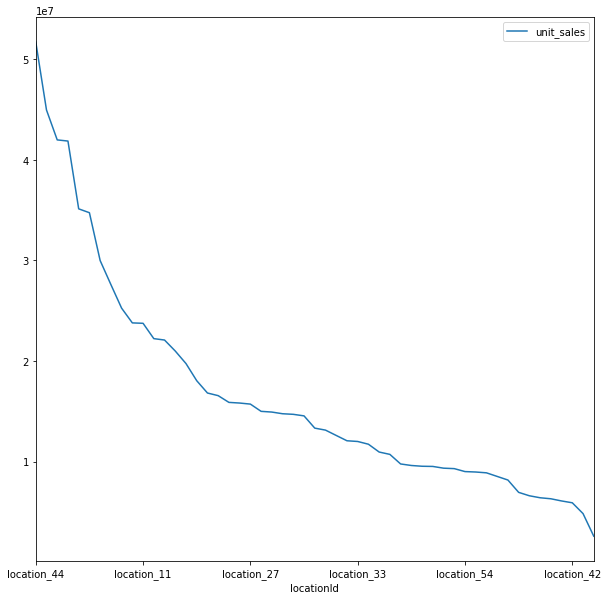

In [0]:
## Plot unit sales per locattion.
fig, ax = plt.subplots(figsize=(10, 10))
highestSales.plot(ax=ax)
fig.show()

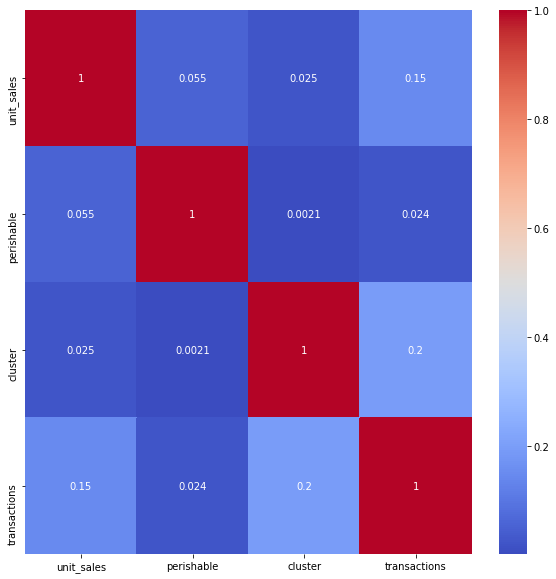

In [0]:
## Find correlation between numeric columns on merged data set.
plt.figure(figsize=(10,10))
sns.heatmap(dataframe3.corr(),cmap='coolwarm',annot = True)
plt.show()

In [0]:
## Copy dataframe3 into day_week_month.
day_week_month = dataframe3.copy()

In [0]:
## Extract day,month,weekday from date column and add to dataframe.
day_week_month['date'] = pd.to_datetime(day_week_month['date'], format='%Y.%m.%d')
day_week_month['month'] = day_week_month['date'].dt.month
day_week_month['year'] = day_week_month['date'].dt.year
day_week_month['weekday'] = day_week_month['date'].dt.weekday

In [0]:
## Check first 5 records of day_week_month.
day_week_month.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions,month,year,weekday
0,2015-01-01,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,770.0,1,2015,3
1,2015-01-01,location_25,item_105574,1.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,770.0,1,2015,3
2,2015-01-01,location_25,item_105575,2.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,770.0,1,2015,3
3,2015-01-01,location_25,item_108079,1.0,False,grocery_items,class_1030,0,Kanpur,Uttar Pradesh,D,1,770.0,1,2015,3
4,2015-01-01,location_25,item_108701,1.0,False,deli_items,class_2644,1,Kanpur,Uttar Pradesh,D,1,770.0,1,2015,3


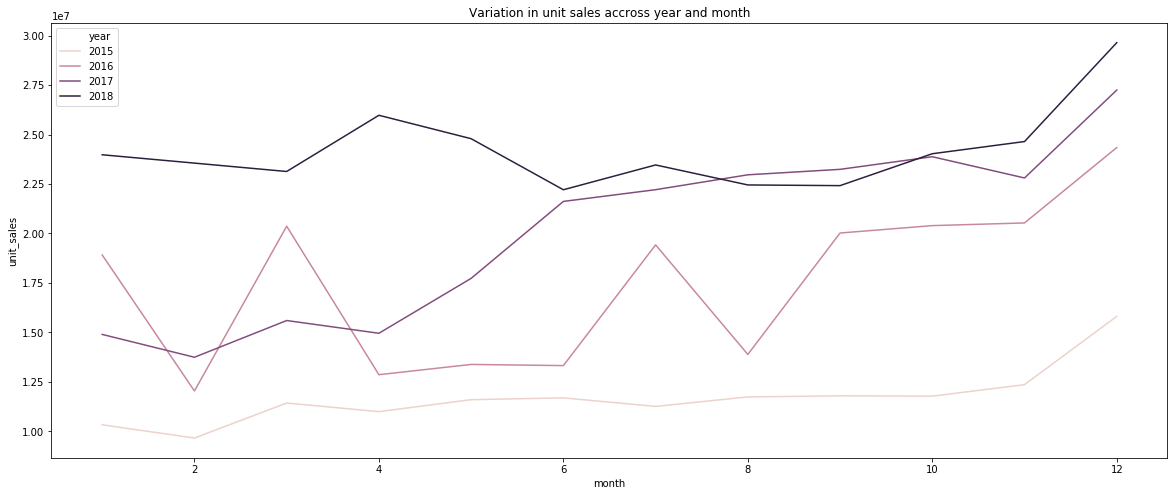

In [0]:
## Variation in unit sales accross year and month(Line Plot).
sales = day_week_month.groupby(['year','month'])['unit_sales'].sum()
sales = pd.DataFrame(sales)
sales.reset_index(inplace=True)
(sales, ['year','month'], object);
plt.figure(figsize=(20,8))
plt.title("Variation in unit sales accross year and month")
sns.lineplot(x='month', y='unit_sales', hue='year', data=sales)

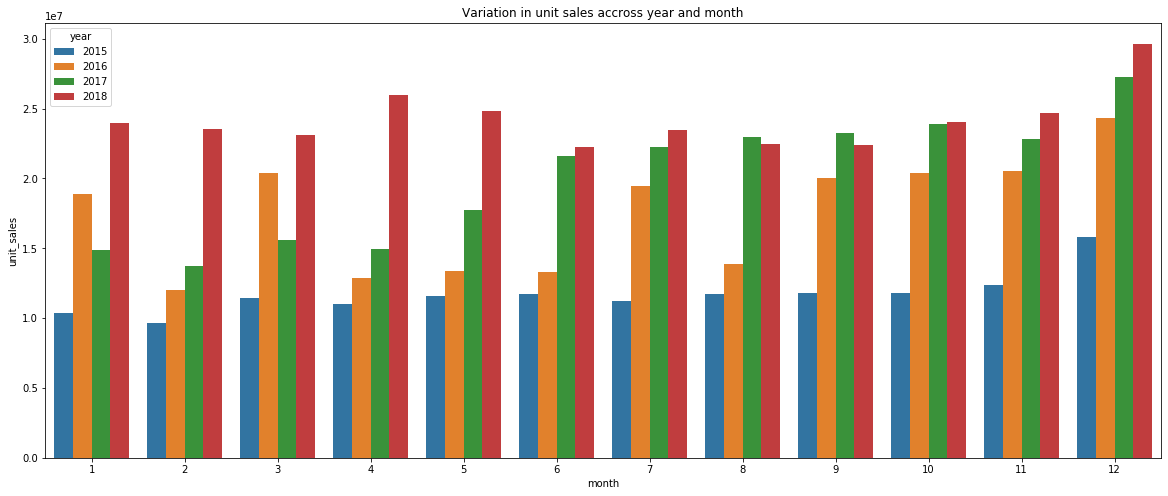

In [0]:
## Variation in unit sales accross year and month(Bar Plot).
sales = day_week_month.groupby(['year','month'])['unit_sales'].sum()
sales = pd.DataFrame(sales)
sales.reset_index(inplace=True)
(sales, ['year','month'], object);
plt.figure(figsize=(20,8))
plt.title("Variation in unit sales accross year and month")
sns.barplot(x='month', y='unit_sales', hue='year', data=sales)

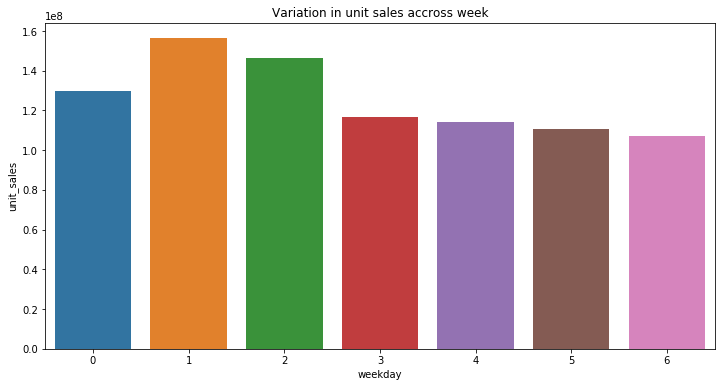

In [0]:
## Unit sales accross week.
sales = day_week_month.groupby(['weekday'])['unit_sales'].sum()
sales = pd.DataFrame(sales)
sales.reset_index(inplace=True)
plt.figure(figsize=(12,6))
plt.title("Variation in unit sales accross week")
sns.barplot(x='weekday', y='unit_sales', data=sales)
## monday is 0 and sunday is 6

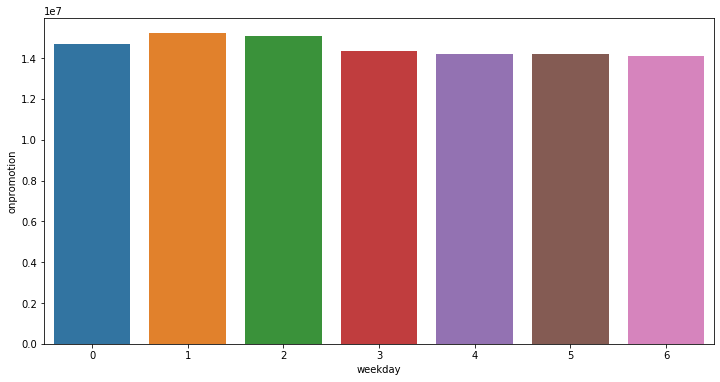

In [0]:
## Week sales VS promotions.
sales = day_week_month.groupby(['weekday'])['onpromotion'].count()
sales = pd.DataFrame(sales)
sales.reset_index(inplace=True)
plt.figure(figsize=(12,6))
sns.barplot(x='weekday', y='onpromotion', data=sales)
#  Monday=0, Sunday=6

In [0]:
## Unit sales accross locations.
sales = day_week_month.groupby(['locationId'])['unit_sales'].sum()
sales = pd.DataFrame(sales)
sales.reset_index(inplace=True)
sales.nlargest(10, 'unit_sales')

,locationId,unit_sales
38,location_44,5.169728e+07
39,location_45,4.493881e+07
41,location_47,4.196799e+07
22,location_3,4.185296e+07
43,location_49,3.511569e+07
40,location_46,3.473206e+07
42,location_48,2.997794e+07
46,location_51,2.759293e+07
51,location_8,2.524470e+07
45,location_50,2.378165e+07


Text(0.5, 1.0, 'unit sales accross locations')

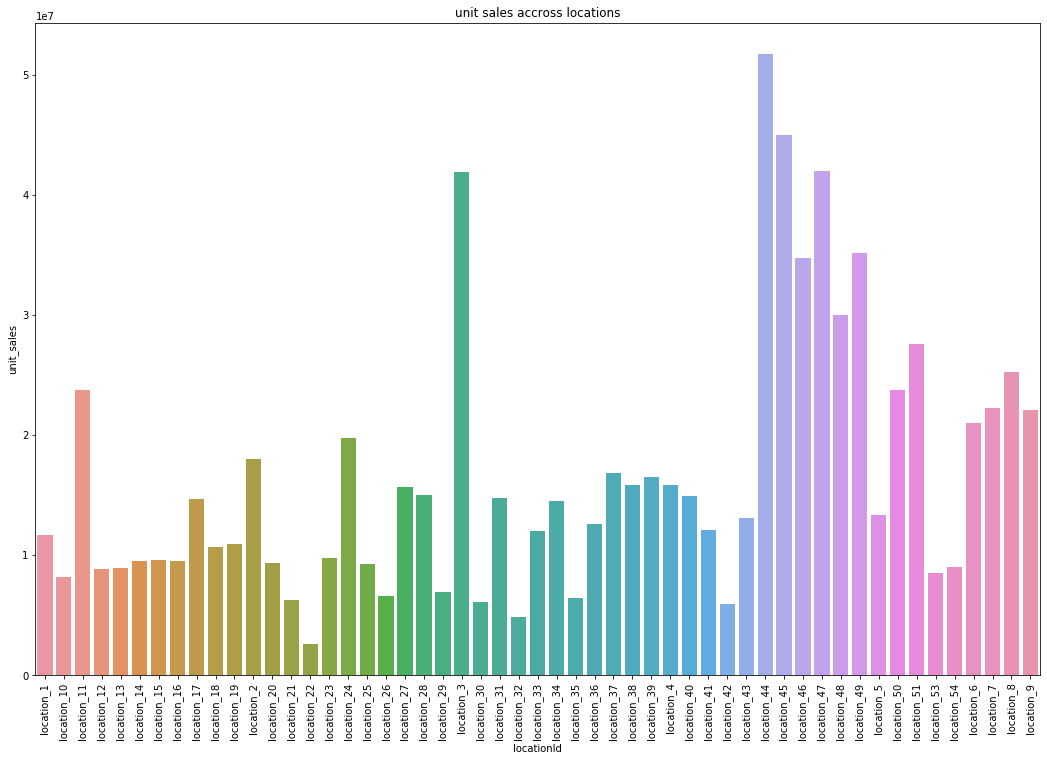

In [0]:
plt.figure(figsize=(18,12))
plot = sns.barplot(x='locationId', y='unit_sales', data=sales)
plt.xticks(rotation='vertical')
plt.title('unit sales accross locations')

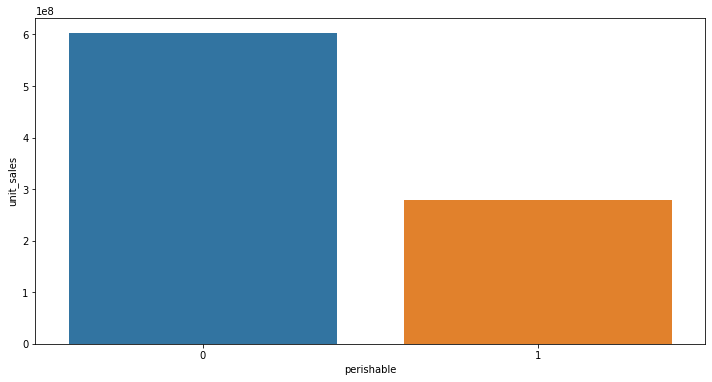

In [0]:
## Unit sales on perishable data.
sales = day_week_month.groupby(['perishable'])['unit_sales'].sum()
sales = pd.DataFrame(sales)
sales.reset_index(inplace=True)
plt.figure(figsize=(12,6))
sns.barplot(x='perishable', y='unit_sales', data=sales)

In [0]:
## Popular item sold on unit sales.
sales = day_week_month.groupby(['item_id','category_of_item'])['unit_sales'].sum()
sales = pd.DataFrame(sales)
sales.reset_index(inplace=True)
sales.nlargest(5, 'unit_sales')

,item_id,category_of_item,unit_sales
44932,item_1503844,other_farm_produce,4.844463e+06
2222,item_1047679,beverages,4.806317e+06
105392,item_807493,beverages,4.072461e+06
87068,item_364606,grocery_items,3.944432e+06
42832,item_1473474,other_farm_produce,3.875422e+06


In [0]:
## Seperating 2015 year month and week.
year2015 = dataframe3[(dataframe3['date'] < '2016-01-01')]
year2015['date'] =  pd.to_datetime(year2015['date'])
year2015['month'] = year2015.date.dt.strftime('%b')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
## Check first 5 records of year2015.
year2015.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions,month,year,weekday
0,2015-01-01,location_25,item_103665,7.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,770.0,Jan,2015,3
1,2015-01-01,location_25,item_105574,1.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,770.0,Jan,2015,3
2,2015-01-01,location_25,item_105575,2.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,770.0,Jan,2015,3
3,2015-01-01,location_25,item_108079,1.0,False,grocery_items,class_1030,0,Kanpur,Uttar Pradesh,D,1,770.0,Jan,2015,3
4,2015-01-01,location_25,item_108701,1.0,False,deli_items,class_2644,1,Kanpur,Uttar Pradesh,D,1,770.0,Jan,2015,3


In [0]:
## Dump year2015 data into pickle.
pickleFileDump('year2015',year2015)

In [0]:
## Read year2015 data from pickle.
year2015 = readPickleFile('year2015')

In [0]:
## Seperating 2016 year month and week.
year2016 = dataframe3[(dataframe3['date'] < '2017-01-01') & (dataframe3['date'] > '2015-12-31')]
year2016['date'] =  pd.to_datetime(year2016['date'])
year2016['month'] = year2016.date.dt.strftime('%b')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
## Check first 5 records of yesr2016.
year2016.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions,month
16322662,2016-01-01,location_25,item_96995,1.0,False,grocery_items,class_1093,0,Kanpur,Uttar Pradesh,D,1,840.0,Jan
16322663,2016-01-01,location_25,item_103665,4.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,840.0,Jan
16322664,2016-01-01,location_25,item_105574,4.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,840.0,Jan
16322665,2016-01-01,location_25,item_105575,3.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,840.0,Jan
16322666,2016-01-01,location_25,item_105737,7.0,False,grocery_items,class_1044,0,Kanpur,Uttar Pradesh,D,1,840.0,Jan


In [0]:
## Dump year2016 data into pickle.
pickleFileDump('year2016',year2016)

In [0]:
## Read year2016 data from pickle.
year2016 = readPickleFile('year2016')

In [0]:
## Seperating 2017 year month and week.
year2017 = dataframe3[(dataframe3['date'] < '2018-01-01') & (dataframe3['date'] > '2016-12-31')]
year2017['date'] =  pd.to_datetime(year2017['date'])
year2017['month'] = year2017.date.dt.strftime('%b')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
## Check first 5 records of year2017.
year2017.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions,month,year,weekday
38594264,2017-01-01,location_25,item_103665,12.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,2202.0,Jan,2017,6
38594265,2017-01-01,location_25,item_105575,23.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,2202.0,Jan,2017,6
38594266,2017-01-01,location_25,item_108634,1.0,False,grocery_items,class_1075,0,Kanpur,Uttar Pradesh,D,1,2202.0,Jan,2017,6
38594267,2017-01-01,location_25,item_108698,6.0,False,deli_items,class_2644,1,Kanpur,Uttar Pradesh,D,1,2202.0,Jan,2017,6
38594268,2017-01-01,location_25,item_108786,6.0,False,cleaning_utilities,class_3044,0,Kanpur,Uttar Pradesh,D,1,2202.0,Jan,2017,6


In [0]:
## Dump year2017 data into pickle.
pickleFileDump('year2017',year2017)

In [0]:
## Read year207 data from pickle.
year2017 = readPickleFile('year2017')

In [0]:
## Seperating 2018 year month and week.
year2018 = dataframe3[dataframe3['date'] > '2017-12-31']
year2018['date'] =  pd.to_datetime(year2018['date'])
year2018['month'] = year2018.date.dt.strftime('%b')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
## Check first 5 records of year2018.
year2018.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions,month
66458908,2018-01-01,location_25,item_105574,12.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,0.0,Jan
66458909,2018-01-01,location_25,item_105575,9.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,0.0,Jan
66458910,2018-01-01,location_25,item_105857,3.0,False,grocery_items,class_1092,0,Kanpur,Uttar Pradesh,D,1,0.0,Jan
66458911,2018-01-01,location_25,item_108634,3.0,False,grocery_items,class_1075,0,Kanpur,Uttar Pradesh,D,1,0.0,Jan
66458912,2018-01-01,location_25,item_108701,2.0,True,deli_items,class_2644,1,Kanpur,Uttar Pradesh,D,1,0.0,Jan


In [0]:
## Dump year2018 data into pickle.
pickleFileDump('year2018',year2018)

In [0]:
## Read year2018 data from pickle.
year2018 = readPickleFile('year2018')

In [0]:
## 2015 sales month wise.
year2015agg = year2015.groupby('month', sort = False).agg({
    'unit_sales':'sum'})

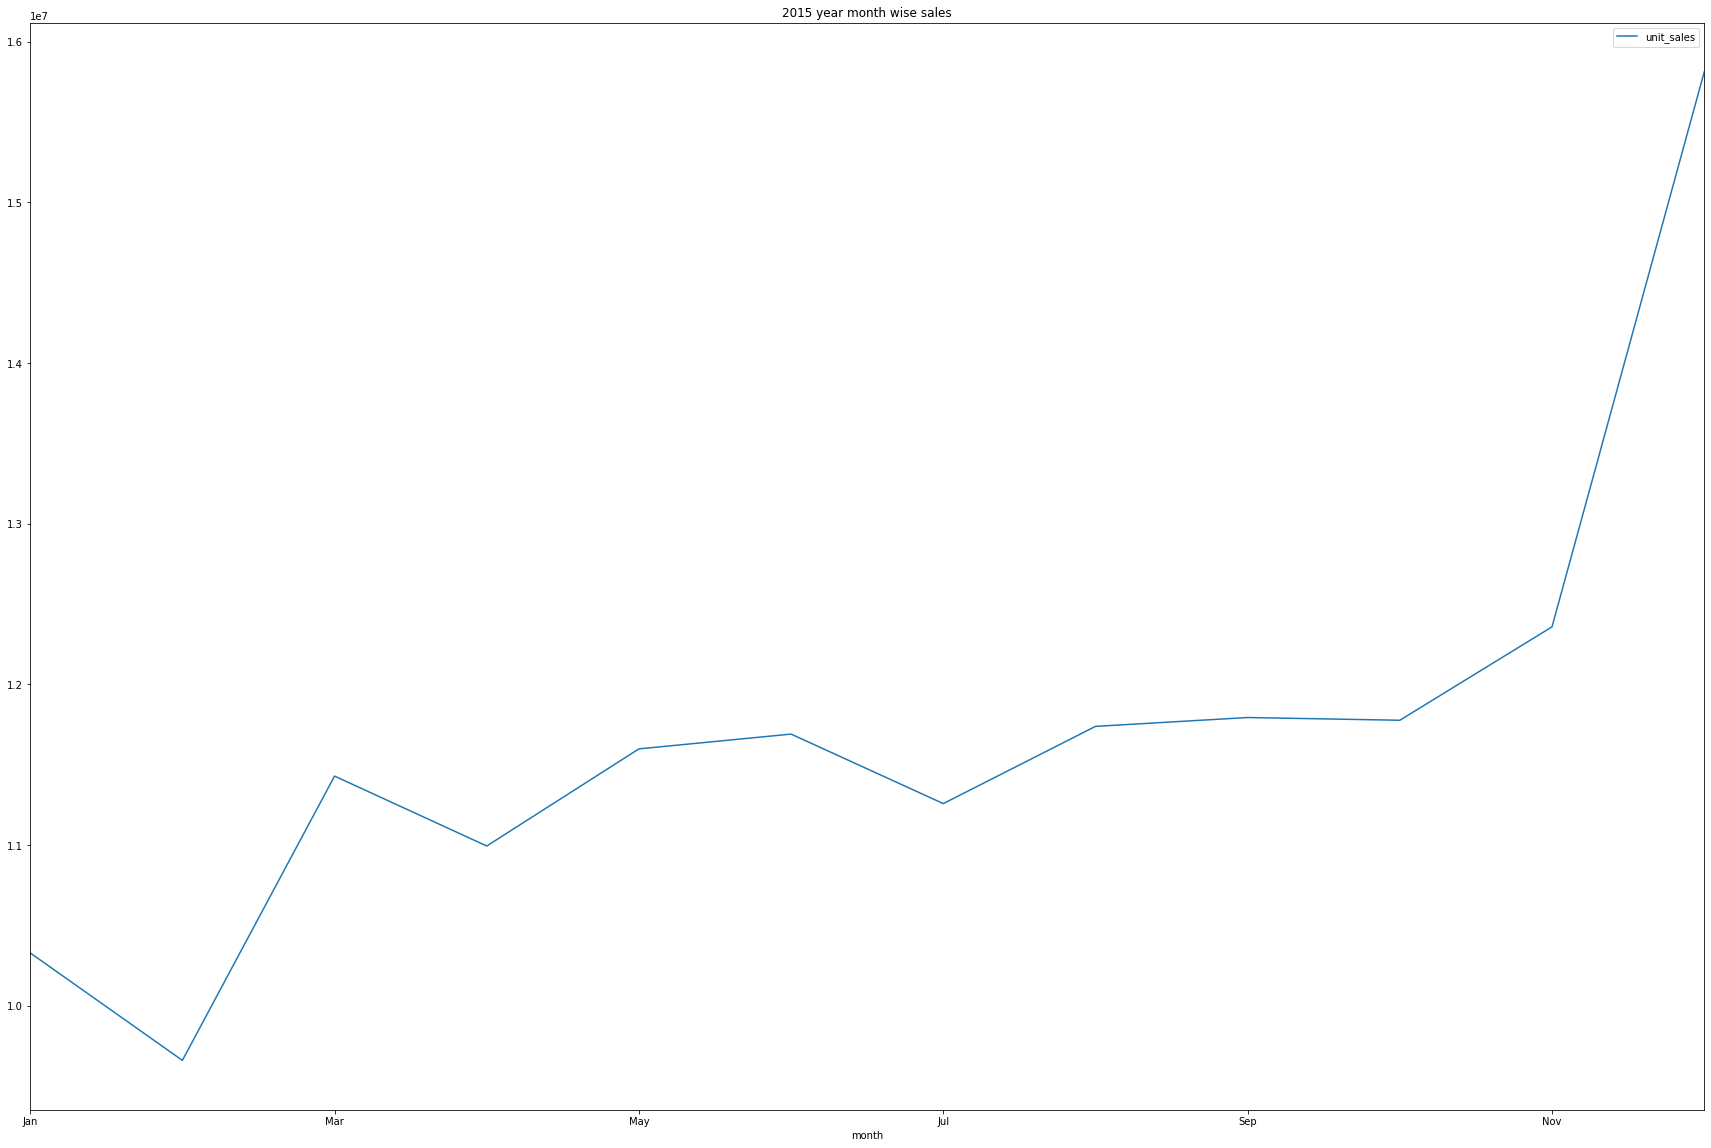

In [0]:
fig, ax = plt.subplots(figsize=(30, 20))
year2015agg.plot(ax=ax)
plt.title('2015 year month wise sales')
fig.show()

In [0]:
## 2016 sales month wise.
year2016agg = year2016.groupby('month', sort = False).agg({
    'unit_sales':'sum'})

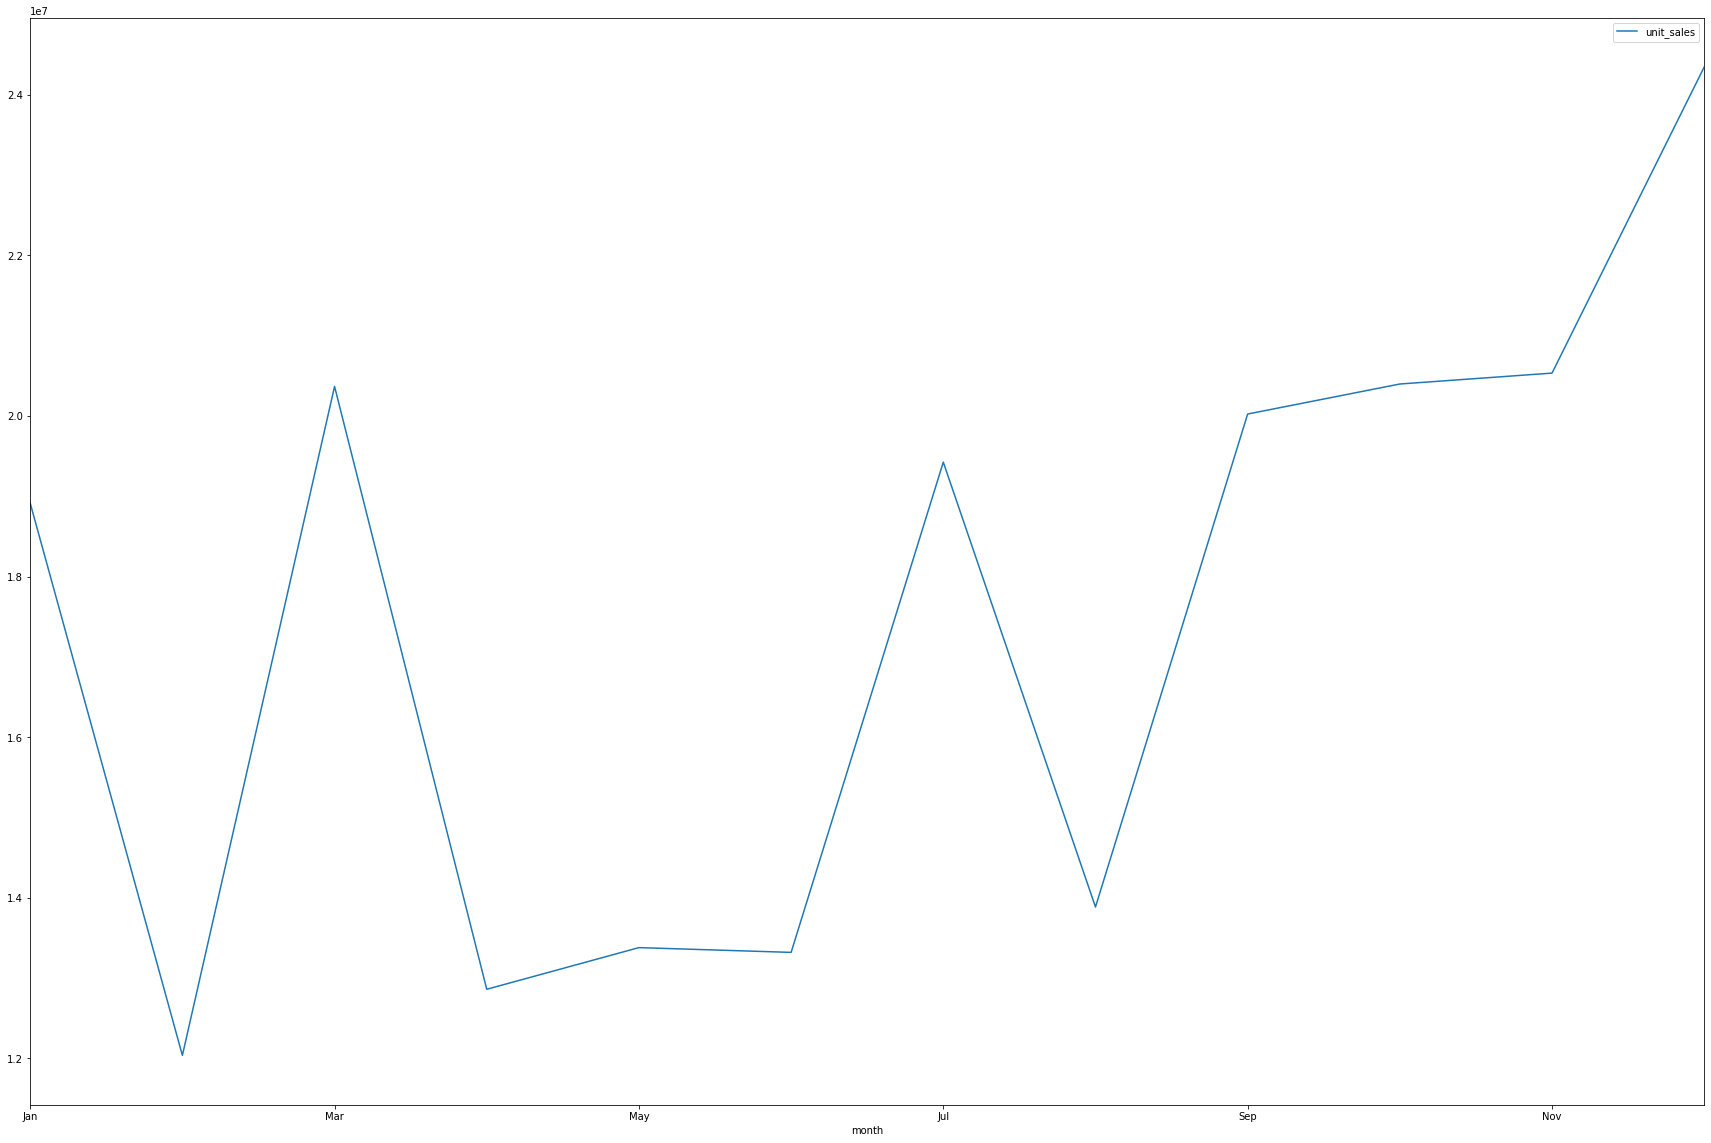

In [0]:
fig, ax = plt.subplots(figsize=(30, 20))
year2016agg.plot(ax=ax)
fig.show()

In [0]:
## 2017 year month wise sales.
year2017agg = year2017.groupby('month', sort = False).agg({
    'unit_sales':'sum'})

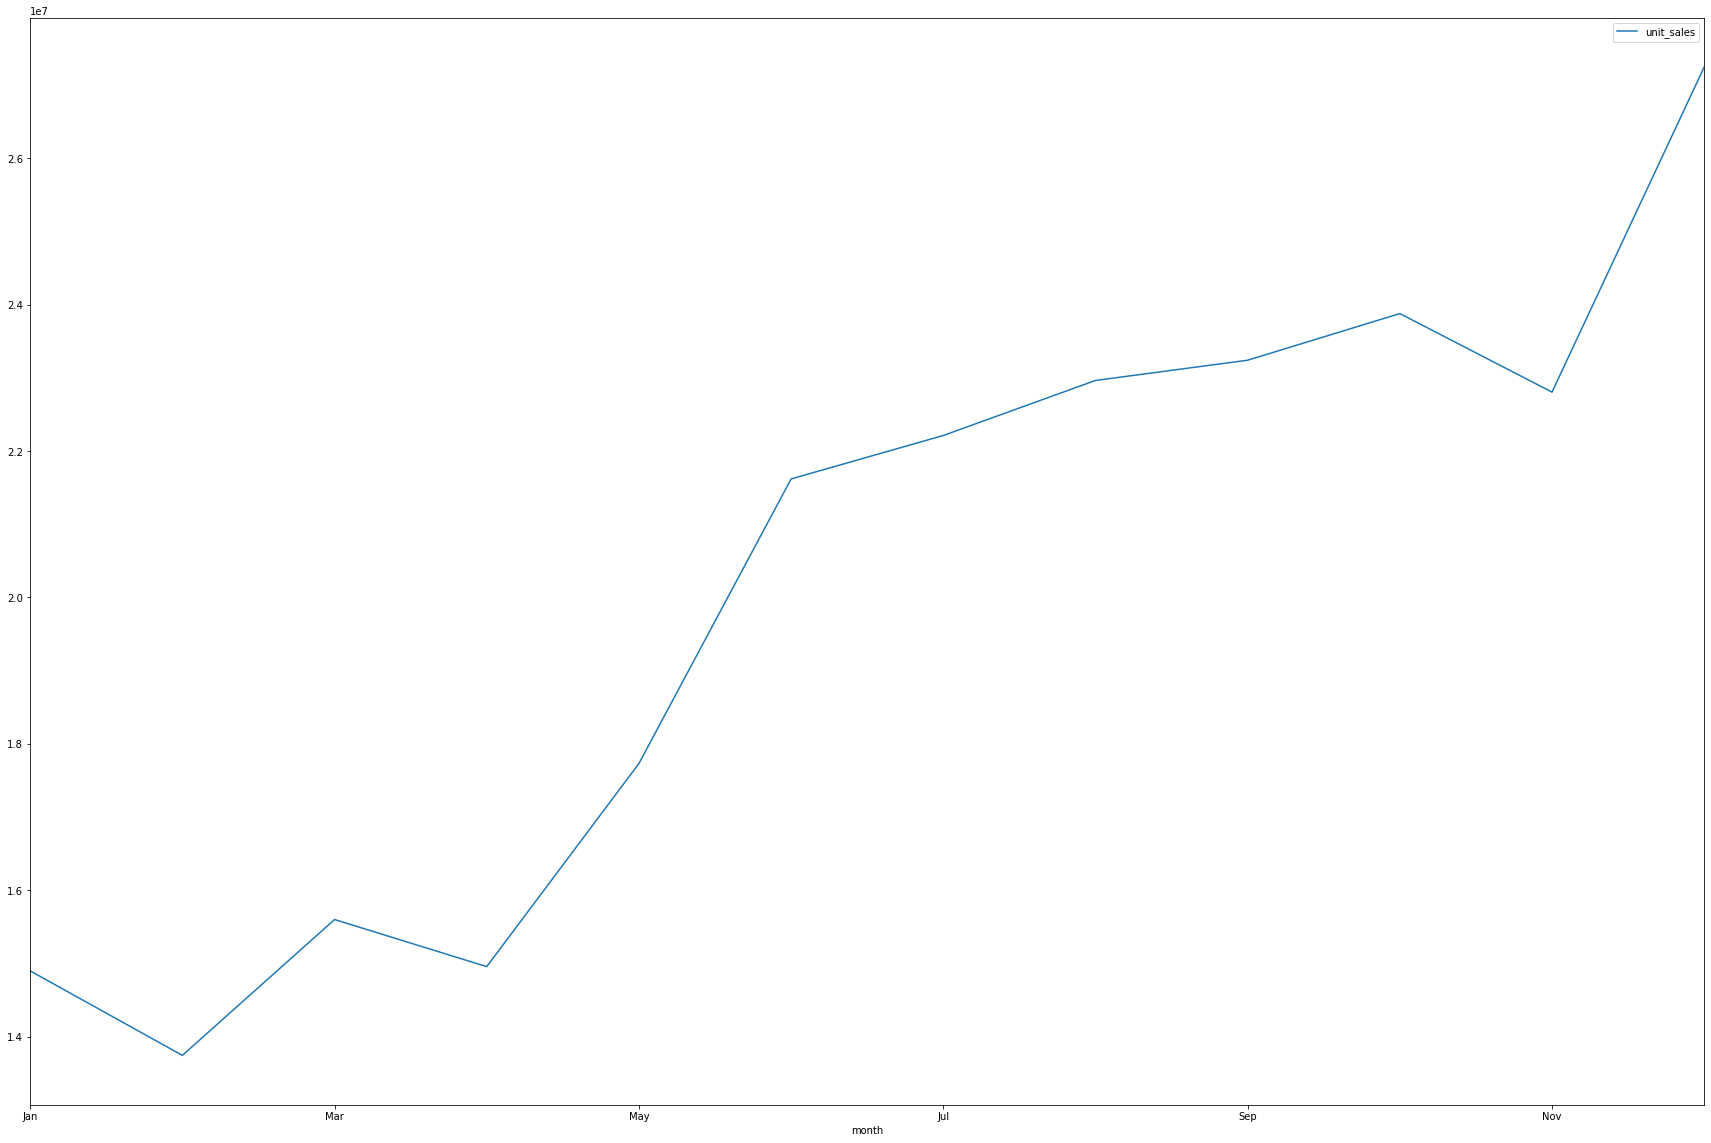

In [0]:
fig, ax = plt.subplots(figsize=(30, 20))
year2017agg.plot(ax=ax)
fig.show()

In [0]:
## 2018 year month wise sales.
year2018agg = year2018.groupby('month', sort = False).agg({
    'unit_sales':'sum'})

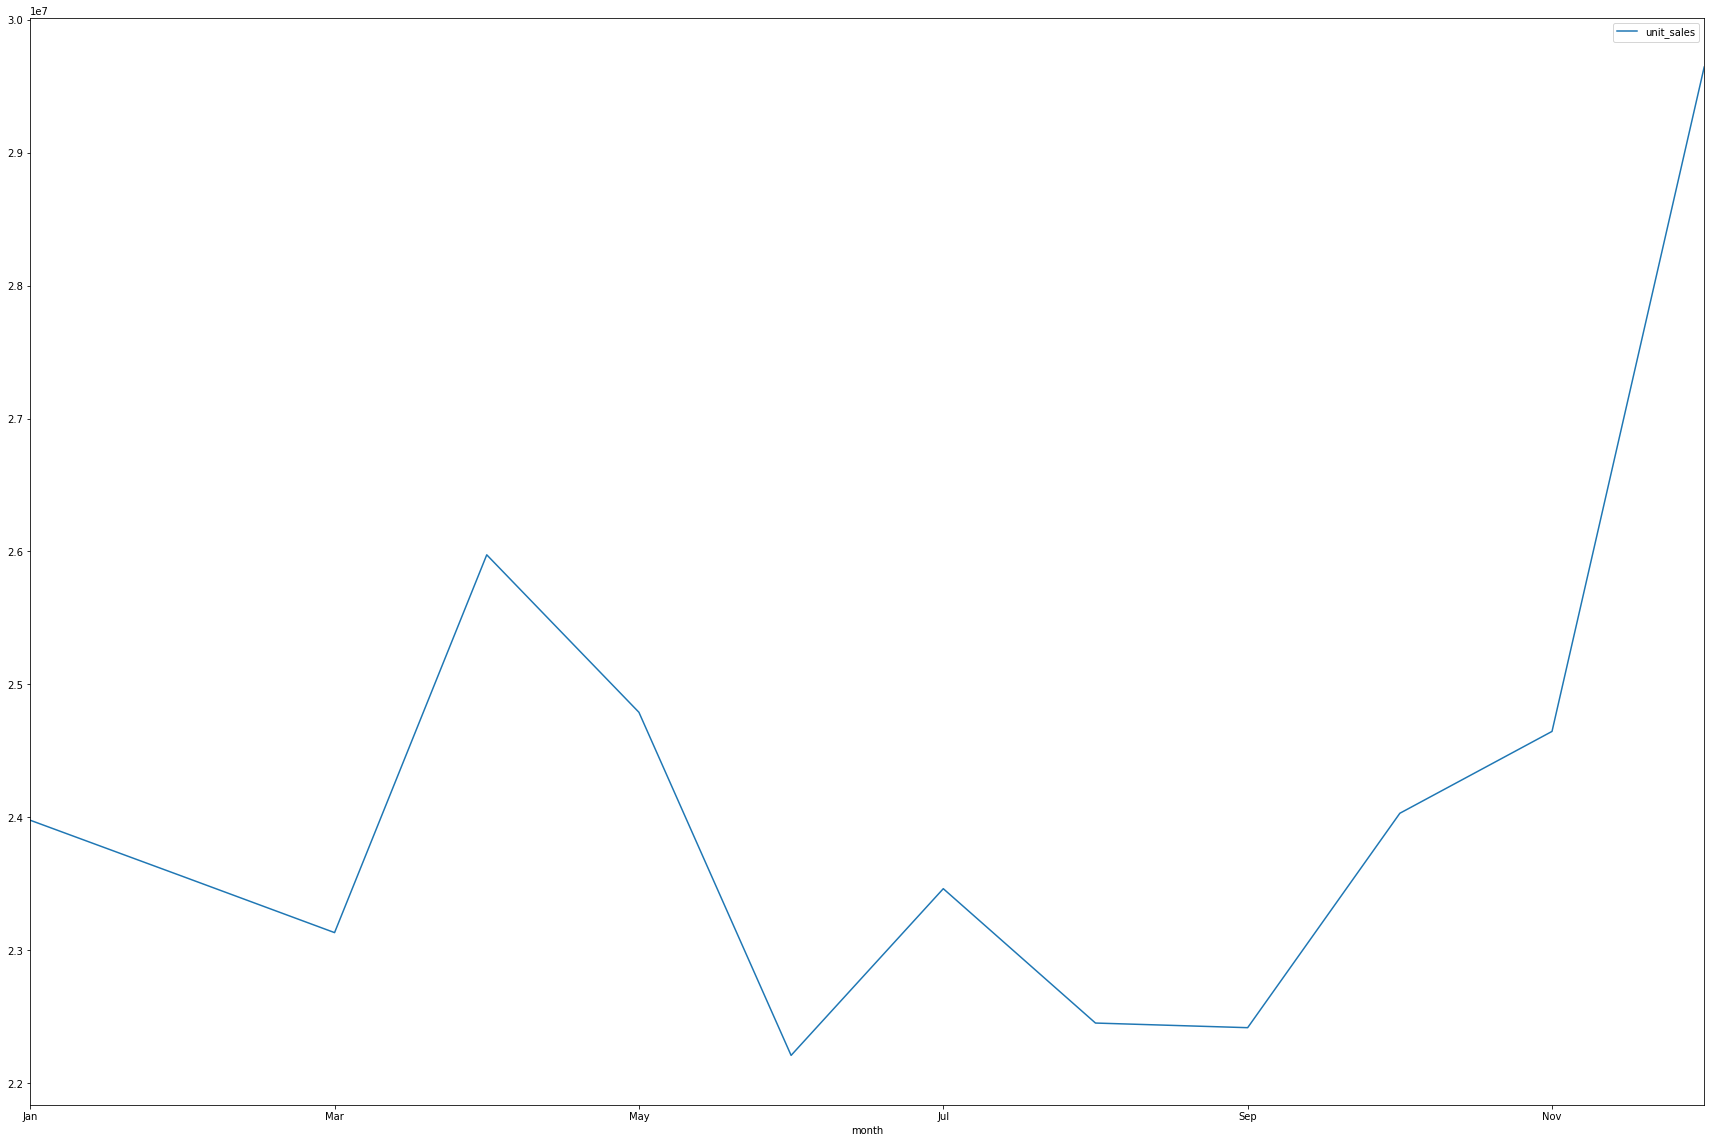

In [0]:
fig, ax = plt.subplots(figsize=(30, 20))
year2018agg.plot(ax=ax)
fig.show()

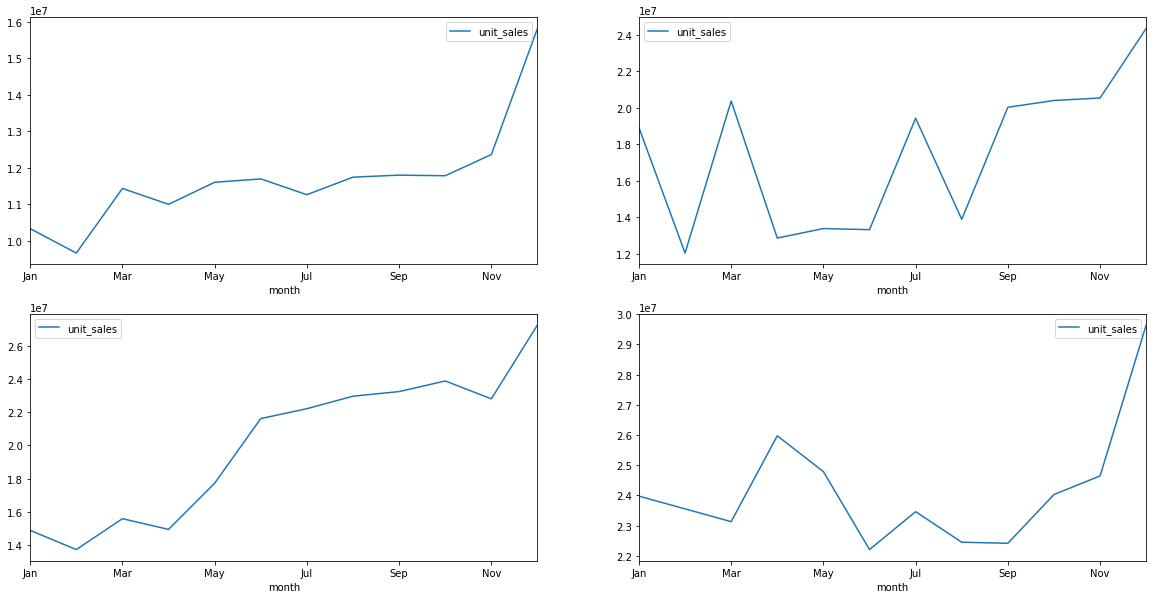

In [0]:
## Month  wise sales across years.
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
year2015agg.plot(ax=ax[0,0])
year2016agg.plot(ax=ax[0,1])
year2017agg.plot(ax=ax[1,0])
year2018agg.plot(ax=ax[1,1])
fig.show()

In [0]:
## Check first 5 records of year2016.
year2016.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster,transactions,month
16322662,2016-01-01,location_25,item_96995,1.0,False,grocery_items,class_1093,0,Kanpur,Uttar Pradesh,D,1,840.0,Jan
16322663,2016-01-01,location_25,item_103665,4.0,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1,840.0,Jan
16322664,2016-01-01,location_25,item_105574,4.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,840.0,Jan
16322665,2016-01-01,location_25,item_105575,3.0,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1,840.0,Jan
16322666,2016-01-01,location_25,item_105737,7.0,False,grocery_items,class_1044,0,Kanpur,Uttar Pradesh,D,1,840.0,Jan


In [0]:
## Cluster top sales across type.
aggr_type_cluster = dataframe3.groupby(['type', 'cluster']).agg({
    'unit_sales' : 'sum'
})

In [0]:
## Reset index for aggr_type_cluster.
aggr_type_cluster = aggr_type_cluster.reset_index()

In [0]:
## Fill NA's with 0.
aggr_type_cluster['unit_sales'] = aggr_type_cluster['unit_sales'].fillna(0)

In [0]:
## Check first 5 records of aggr_type_cluster.
aggr_type_cluster.head()

,type,cluster,unit_sales
0,A,1,0.000000e+00
1,A,2,0.000000e+00
2,A,3,0.000000e+00
3,A,4,0.000000e+00
4,A,5,5.169728e+07


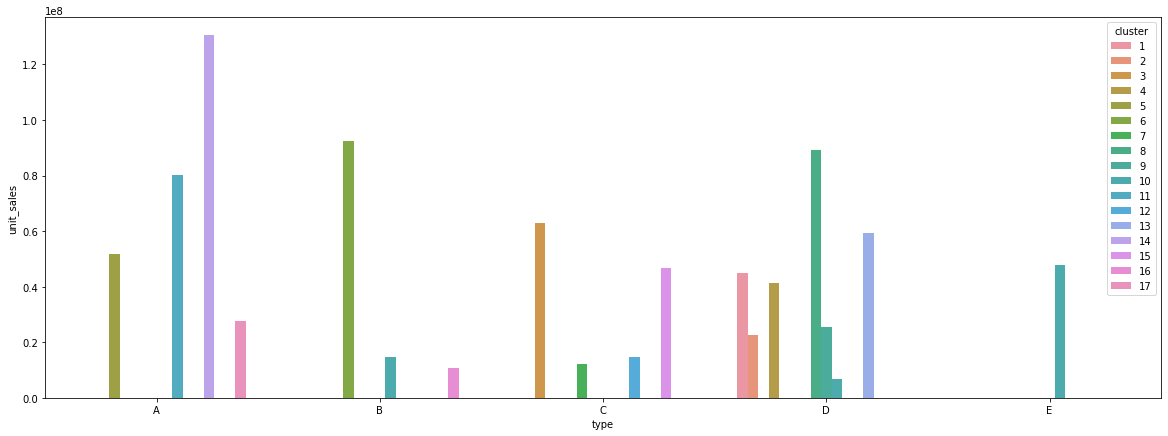

In [0]:
## Plot unit sales accorss cluster.
plt.figure(figsize=(20,7))
sns.barplot(x=aggr_type_cluster['type'],y='unit_sales', hue = aggr_type_cluster['cluster'] ,data=aggr_type_cluster)

## Preprocessing

In [0]:
## Subset 2 years data from train data.
salesData = salesData[salesData['date']>='2017-01-01']

In [0]:
## Extract day,month,day from date column and add to dataframe.
salesData['date'] = pd.to_datetime(salesData['date'], format='%Y.%m.%d')
salesData['month'] = salesData['date'].dt.month
salesData['year'] = salesData['date'].dt.year
salesData['week'] = salesData['date'].dt.day

In [0]:
## Check first 5 records of train data.
salesData.head()

,date,locationId,item_id,unit_sales,onpromotion,month,year,week
38594264,2017-01-01,location_25,item_103665,12.0,False,1,2017,1
38594265,2017-01-01,location_25,item_105575,23.0,False,1,2017,1
38594266,2017-01-01,location_25,item_108634,1.0,False,1,2017,1
38594267,2017-01-01,location_25,item_108698,6.0,False,1,2017,1
38594268,2017-01-01,location_25,item_108786,6.0,False,1,2017,1


In [0]:
## Check column data types of train data.
salesData.dtypes

date           datetime64[ns]
locationId           category
item_id              category
unit_sales            float64
onpromotion              bool
month                   int64
year                    int64
week                    int64
dtype: object

In [0]:
## Drop date column from train data as we have extarcted features from date so it not required to keep.
salesData.drop('date', inplace = True, axis=1)

In [0]:
## Check NA values of train data.
salesData.isna().sum()

locationId     0
item_id        0
unit_sales     0
onpromotion    0
month          0
year           0
week           0
dtype: int64

In [0]:
## Check dimensions of train data.
salesData.shape

(63084471, 7)

In [0]:
## Extarct day,month,day frpm date and to testData dataframe.
testData['date'] = pd.to_datetime(testData['date'], format='%Y.%m.%d')
testData['month'] = testData['date'].dt.month
testData['year'] = testData['date'].dt.year
testData['week'] = testData['date'].dt.day

In [0]:
## Drop date column from testData.
testData.drop('date', inplace = True, axis=1)

In [0]:
## Set id column as index to test data.
testData.set_index('id', inplace=True)

In [0]:
## Check first 5 records fo test data.
testData.head()

,locationId,item_id,onpromotion,month,year,week
id,,,,,,
0,location_25,item_99197,False,1,2019,1
1,location_25,item_103665,False,1,2019,1
2,location_25,item_105574,False,1,2019,1
3,location_25,item_105857,False,1,2019,1
4,location_25,item_106716,False,1,2019,1


In [0]:
## Seperate features/predictors/independent from train data
features = salesData.drop('unit_sales', axis=1)

In [0]:
## Seperate target/dependent column from train data
target = salesData['unit_sales']

## Linear Regression

In [0]:
## Import train_test_split and regression model from sklearn library.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
## Split data into trian,validation(70:30 ratio).
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=123)

In [ ]:
## To perform label encoding, we need to append train and test data and fit label encoder on it
## (beacuse train and  test will not have same lebel so that is reason we combined both  data and build label encoder and
## will transform train and  test individuallly).
combined_data = salesData.append(testData)

In [ ]:
## Instantiate label encoder.
le_locationId = LabelEncoder()
le_itemId = LabelEncoder()
le_onpromotion = LabelEncoder()
le_month = LabelEncoder()
le_year = LabelEncoder()
le_week = LabelEncoder()

In [ ]:
## Fit the label encoder model.
combined_data['locationId'] = le_locationId.fit_transform(combined_data['locationId'])
combined_data['item_id'] = le_itemId.fit_transform(combined_data['item_id'])
combined_data['onpromotion'] = le_onpromotion.fit_transform(combined_data['onpromotion'])
combined_data['month'] = le_month.fit_transform(combined_data['month'])
combined_data['year'] = le_year.fit_transform(combined_data['year'])
combined_data['week'] = le_week.fit_transform(combined_data['week'])

In [ ]:
## Check first 5 records of combined data after doing label encoding.
combined_data.head()

In [ ]:
## Do label encoding on train data.
X_train['locationId'] = le_locationId.transform(X_train['locationId'])
X_train['item_id'] = le_itemId.transform(X_train['item_id'])
X_train['onpromotion'] = le_onpromotion.transform(X_train['onpromotion'])
X_train['month'] = le_month.transform(X_train['month'])
X_train['year'] = le_year.transform(X_train['year'])
X_train['week'] = le_week.transform(X_train['week'])

In [ ]:
## Do label encoding on validation data.
X_test['locationId'] = le_locationId.transform(X_test['locationId'])
X_test['item_id'] = le_itemId.transform(X_test['item_id'])
X_test['onpromotion'] = le_onpromotion.transform(X_test['onpromotion'])
X_test['month'] = le_month.transform(X_test['month'])
X_test['year'] = le_year.transform(X_test['year'])
X_test['week'] = le_week.transform(X_test['week'])

In [ ]:
## Do label encoding on test data.
testData['locationId'] = le_locationId.transform(testData['locationId'])
testData['item_id'] = le_itemId.transform(testData['item_id'])
testData['onpromotion'] = le_onpromotion.transform(testData['onpromotion'])
testData['month'] = le_month.transform(testData['month'])
testData['year'] = le_year.transform(testData['year'])
testData['week'] = le_week.transform(testData['week'])

In [ ]:
## Check first 5 records of train data after doing label encoding.
X_train.head()

In [ ]:
## Check first 5 records of validation data after doing label encoding.
X_test.head()

In [ ]:
## Check first 5 records of test data after doing label encoding.
testData.head()

In [0]:
## Dump X_train dataframe into pickle file.
pickleFileDump('X_train',X_train)

In [0]:
## Dump X_test dataframe into pickle file.
pickleFileDump('X_test',X_test)

In [0]:
## Dump y_train dataframe into pickle file.
pickleFileDump('y_train',y_train)

In [0]:
## Dump y_test dataframe into pickle file.
pickleFileDump('y_test',y_test)

In [0]:
## Initialize regression model and fit the model.
model=LinearRegression()
res = model.fit(X_train,y_train)

In [0]:
## Get predictions on train data.
pred_train = res.predict(X_train)

In [0]:
## Fucntion will calculate MAPE and returns.
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
## Calculate MAPE for train on actual and predicted values.
train_MAPE = mean_absolute_percentage_error(y_train, pred_train)

In [0]:
## Display MAPE value for train.
print(train_MAPE)

241.73176136057052


In [0]:
## Get predictions on validation data.
pred_val = res.predict(X_test)

In [0]:
## Calculate MAPE for validation on actual and predicted values.
test_MAPE = mean_absolute_percentage_error(y_test, pred_val)

In [0]:
## Display MAPE value for validation.
print(test_MAPE)

241.8592106115126


In [0]:
## Get predictions on test data.
pred_test = res.predict(testData)

In [0]:
## Dump test data into pickle file.
pickleFileDump('testData',testData)

In [0]:
## Check dimensions of test predicion data.
pred_test.shape

(1482295,)

In [0]:
## Check dimensions of test data.
testData.shape

(1482295, 6)

In [0]:
## Create a dataframe with test index,test predictions and copy dataframe data into a csv file.
dataframe2 = pd.DataFrame({'id' : testData.index,
                          'unit_sales' : pred_test})
dataframe2.to_csv('unit_sales_predc2.csv',index=False)

In [0]:
## Read X_train data from pickle.
X_train = readPickleFile('X_train')

In [0]:
## Read X_test data from pickle.
X_test = readPickleFile('X_test')

In [0]:
## Read y_train data from pickle.
y_train = readPickleFile('y_train')

In [0]:
## Read y_test data fromm pickle.
y_test = readPickleFile('y_test')

In [0]:
## Read test data from pickle.
testData =  readPickleFile('testData')

In [0]:
## Check dimensions of X_train.
X_train.shape

(44159129, 6)

In [0]:
## Check dimensions of X_test.
X_test.shape

(18925342, 6)

In [0]:
## Check dimensions of y_train.
y_train.shape

(44159129,)

In [0]:
## Check dimensions of y_test.
y_test.shape

(18925342,)

In [0]:
## Check dimensions of test data.
testData.shape

(1482295, 6)

## KNN Model

In [0]:
## Import KNN model from sklearn library.
from sklearn.neighbors import KNeighborsRegressor

In [0]:
## Instantiate KNN model.
knn = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 4,
                           metric = "euclidean")

In [0]:
## Fit a model.
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [0]:
## Get the predictions on train and validation data.
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

In [0]:
## Get prediction values on test data.
pred_test = knn.predict(testData)

In [0]:
## Display MAPE for train.
print('Train MAPE', mean_absolute_percentage_error(y_train, pred_train))

In [0]:
## Display MAPE for validation.
print('Test MAPE', mean_absolute_percentage_error(y_test, pred_test))

In [0]:
## Create a dataframe with test index,test predictions and copy dataframe data into a csv file.
dataframe2 = pd.DataFrame({'id' : testData.index,
                          'unit_sales' : pred_test})
dataframe2.to_csv('unit_sales_KNN.csv',index=False)

## Decision Tree

In [0]:
## Import Decision Tree mmodel from sklearn library.
from sklearn.tree import DecisionTreeRegressor

In [0]:
## Instantiate DecisionTreeRegressor class and fit the model.
dtr = DecisionTreeRegressor(max_depth=5,min_samples_leaf=10,min_samples_split=5,random_state=123,criterion='mae')
dtr.fit(X_train,y_train)

In [0]:
## Get the predictions on train and validation data.
pred_train = dtr.predict(X_train)
pred_test = dtr.predict(X_test)

In [0]:
## Get the prediction values on test data.
pred_test = dtr.predict(testData)

In [0]:
## Display MAPE for train and validation.
print('Train MAPE', mean_absolute_percentage_error(y_train, pred_train))
print('Test MAPE', mean_absolute_percentage_error(y_test, pred_test))

Train MAPE 218.55826253728017
Test MAPE 218.7049848160023


In [0]:
## Check dimensions of prediction value of test data.
pred_test.shape

(1482295,)

In [0]:
## Check dimesnions of test data.
testData.shape

(1482295, 6)

In [0]:
## Create a dataframe with test index,test predictions data and copy dataframe into a csv file.
dataframe2 = pd.DataFrame({'id' : testData.index,
                          'unit_sales' : pred_test})
dataframe2.to_csv('unit_sales_decisionTree.csv',index=False)

## Random Forest

In [0]:
## Import RandomForestRegressor class from sklearn library.
from sklearn.ensemble import RandomForestRegressor

In [0]:
## Instantiate RandomForestRegressor class.
randomForest = RandomForestRegressor(n_estimators= 25, max_depth= 10,criterion='mae')

In [0]:
## Fit a model.
randomForest.fit(X_train,y_train)

In [0]:
## Get the predictions on train and validation data.
pred_train = randomForest.predict(X_train)
pred_test = randomForest.predict(X_test)

In [0]:
## Get the prediction  values for test data.
pred_test = randomForest.predict(testData)

In [0]:
## Display MAPE for train and validation.
print('Train MAPE', mean_absolute_percentage_error(y_train, pred_train))
print('Test MAPE', mean_absolute_percentage_error(y_test, pred_test))

Train MAPE 193.35239594403976
Test MAPE 193.47099536429627


In [0]:
## Create a dataframe with test index,test predictions data and copy dataframe into a csv file.
dataframe2 = pd.DataFrame({'id' : testData.index,
                          'unit_sales' : pred_test})
dataframe2.to_csv('unit_sales_randomForest.csv',index=False)

## XG Boost

In [3]:
## Import XGBRegressor class from xgboost.sklearn library.
from xgboost.sklearn import XGBRegressor

In [0]:
## Instantiate XGBRegressor and fit a model.
xgb_model=XGBRegressor(n_estimators=100,learning_rate=0.001)
%time xgb_model.fit(X_train,y_train,verbose=True)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[11:10:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:00] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
CPU times: user 2h 14min 38s, sys: 6 s, total: 2h 14min 44s
Wall time: 2h 14min 46s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
## Dump xgb_model into pickle.
pickleFileDump('xgb_model',xgb_model)

In [0]:
## Get the predictions on train and validation data.
pred_train = xgb_model.predict(X_train)
pred_test = xgb_model.predict(X_test)

In [0]:
## Get predictions on test data.
pred_test = xgb_model.predict(testData)

In [0]:
## Check dimesnions of prediction of test data.
pred_test.shape

(1482295,)

In [0]:
## Check dimensions of test data.
testData.shape

(1482295, 6)

In [0]:
## Display MAPE for train and validation data.
print('Train MAPE', mean_absolute_percentage_error(y_train, pred_train))
print('Test MAPE', mean_absolute_percentage_error(y_test, pred_test))

Train MAPE 61.964722403862616
Test MAPE 61.95000128333308


In [0]:
## Create a dataframe with test index,test predictions data and copy dataframe into a csv file.
dataframe2 = pd.DataFrame({'id' : testData.index,
                          'unit_sales' : pred_test})
dataframe2.to_csv('unit_sales_XGB.csv',index=False)

XGBoost with param tuning - 1

In [0]:
## Instantiate XGBRegressor and fit a model.
xgb_model_tuning=XGBRegressor(n_estimators=200,learning_rate=0.0001)
%time xgb_model_tuning.fit(X_train,y_train,verbose=True)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[02:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:11:40] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
CPU times: user 3h 19min 16s, sys: 5.25 s, total: 3h 19min 21s
Wall time: 3h 19min 23s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.0001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
## Get the predictions on train and validation data.
pred_train = xgb_model_tuning.predict(X_train)
pred_test = xgb_model_tuning.predict(X_test)

In [0]:
## Display MAPE for train and validation.
print('Train MAPE', mean_absolute_percentage_error(y_train, pred_train))
print('Test MAPE', mean_absolute_percentage_error(y_test, pred_test))

Train MAPE 75.43020830651272
Test MAPE 75.41344304225049


In [0]:
## Get predictions for test data.
pred_test = xgb_model_tuning.predict(testData)

In [0]:
## Check dimensions of predictions of test data.
pred_test.shape

(1482295,)

In [0]:
## Check dimensions of test data.
testData.shape

(1482295, 6)

In [0]:
## Create a dataframe with test index,test predictions data and copy dataframe into a csv file.
dataframe2 = pd.DataFrame({'id' : testData.index,
                          'unit_sales' : pred_test})
dataframe2.to_csv('unit_sales_XGB_ParamTuning.csv',index=False)

XGBoost with param tuning - 2

In [0]:
## Instantiate XGBRegressor and fit a model.
xgb_model=XGBRegressor(n_estimators=15,learning_rate=0.001,booster='gblinear')
%time xgb_model.fit(X_train,y_train,verbose=True)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[05:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2min 10s, sys: 6.43 s, total: 2min 17s
Wall time: 2min 17s


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=15,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
## Get the predictions on train and validation data.
pred_train = xgb_model.predict(X_train)
pred_test = xgb_model.predict(X_test)

In [0]:
## Display MAPE for train and validation.
print('Train MAPE', mean_absolute_percentage_error(y_train, pred_train))
print('Test MAPE', mean_absolute_percentage_error(y_test, pred_test))

Train MAPE 63.05436644594165
Test MAPE 63.0348354772083


XGBoost with param tuning - 3

In [0]:
## Instantiate XGBRegressor and fit a model.
xgb_model=XGBRegressor(n_estimators=20,learning_rate=0.001,booster='gblinear')
%time xgb_model.fit(X_train,y_train,verbose=True)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[05:35:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2min 26s, sys: 2.52 s, total: 2min 29s
Wall time: 2min 29s


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=18,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
## Get the predictions on train and validation data.
pred_train = xgb_model.predict(X_train)
pred_test = xgb_model.predict(X_test)

In [0]:
## Display MAPE for train and validation data.
print('Train MAPE', mean_absolute_percentage_error(y_train, pred_train))
print('Test MAPE', mean_absolute_percentage_error(y_test, pred_test))

Train MAPE 62.823828322930666
Test MAPE 62.80788441241856


In [0]:
## Get prediction values for test data.
pred_test = xgb_model.predict(testData)

In [0]:
## Check dimensions of prediction of test data.
pred_test.shape

(1482295,)

In [0]:
## check dimensions of test data.
testData.shape

(1482295, 6)

In [0]:
## Create a dataframe with test index,test predictions data and copy dataframe into a csv file.
dataframe2 = pd.DataFrame({'id' : testData.index,
                          'unit_sales' : pred_test})
dataframe2.to_csv('unit_sales_XGB_ParamTuning_best.csv',index=False)

## Ridge

In [0]:
## Import Ridge class from sklearn library.
from sklearn.linear_model import Ridge

In [0]:
## Instantiate Ridge and fit a model.
Ridge_model= Ridge(alpha=2,normalize=False)
Ridge_model.fit(X_train,y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [0]:
## Get the predictions on train and validation data.
pred_train = Ridge_model.predict(X_train)
pred_test = Ridge_model.predict(X_test)

In [0]:
## Get the prediction values on test data.
test_pred = Ridge_model.predict(testData)

In [0]:
## Check dimensions of predictions of test data.
test_pred.shape

(1482295,)

In [0]:
## Check the shapes of test data.
testData.shape

(1482295, 6)

In [0]:
## Print MAPE for train and validation.
print('Train MAPE', mean_absolute_percentage_error(y_train, pred_train))
print('Test MAPE', mean_absolute_percentage_error(y_test, pred_test))

Train MAPE 241.73176339347538
Test MAPE 241.85921265532616


In [0]:
## Create a dataframe with test index,test predictions data and copy dataframe into a csv file.
dataframe2 = pd.DataFrame({'id' : testData.index,
                          'unit_sales' : test_pred})
dataframe2.to_csv('unit_sales_ridge.csv',index=False)

## Lasso

In [0]:
## Import Lasso from sklearn library.
from sklearn.linear_model import Lasso

In [0]:
## Instantiate Lasso and fit a model.
Lasso_model= Lasso(alpha=1.0,normalize=False)
Lasso_model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
## Get the predictions on train and validation data.
pred_train = Lasso_model.predict(X_train)
pred_test = Lasso_model.predict(X_test)

In [0]:
## Get the predictions on test data.
test_pred = Lasso_model.predict(testData)

In [0]:
## Display MAPE for train and validation. 
print('Train MAPE', mean_absolute_percentage_error(y_train, pred_train))
print('Test MAPE', mean_absolute_percentage_error(y_test, pred_test))

Train MAPE 245.39478220282044
Test MAPE 245.53870514595536


In [0]:
## Create a dataframe with test index,test predictions data and copy dataframe into a csv file.
dataframe2 = pd.DataFrame({'id' : testData.index,
                          'unit_sales' : test_pred})
dataframe2.to_csv('unit_sales_lasso.csv',index=False)

## AdaBoost

In [0]:
## Import AdaBoostRegressor class from sklear library.
from sklearn.ensemble import AdaBoostRegressor

In [0]:
## Instantiate AdaBoostRegressor and fit a model.
Adaboost_model = AdaBoostRegressor(n_estimators=20,learning_rate=0.001)
%time Adaboost_model.fit(X_train, y_train)

CPU times: user 58min 14s, sys: 5.01 s, total: 58min 19s
Wall time: 58min 20s


AdaBoostRegressor(base_estimator=None, learning_rate=0.001, loss='linear',
                  n_estimators=20, random_state=None)

In [0]:
## Dump Adaboost_model into pickle.
pickleFileDump('Adaboost_model',Adaboost_model)

In [0]:
## Get the predictions on train and validation data.
pred_train = Adaboost_model.predict(X_train)
pred_test = Adaboost_model.predict(X_test)

In [0]:
## Get the prediction values in test data.
test_pred = Adaboost_model.predict(testData)

In [0]:
## Display MAPE for train and validation.
print('Train MAPE', mean_absolute_percentage_error(y_train, pred_train))
print('Test MAPE', mean_absolute_percentage_error(y_test, pred_test))

In [0]:
## Create a dataframe with test index,test predictions data and copy dataframe into a csv file.
dataframe2 = pd.DataFrame({'id' : testData.index,
                          'unit_sales' : test_pred})
dataframe2.to_csv('unit_sales_ADB.csv',index=False)

## GradientBoosting

In [0]:
## Import GradientBoostingRegressor class from sklearn library.
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
## Instantiate GradientBoostingRegressor and fit a model.
gbm = GradientBoostingRegressor(n_estimators=50,learning_rate=0.001,random_state=474)
%time gbm.fit(X=X_train, y=y_train)

CPU times: user 1h 3min 38s, sys: 2.55 s, total: 1h 3min 40s
Wall time: 1h 3min 41s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.001, loss='ls',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=474, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
## Get the predictions on train and validation data.
pred_train = gbm.predict(X_train)
pred_test = gbm.predict(X_test)

In [0]:
## Get the predictions for test data.
test_pred = gbm.predict(testData)

In [0]:
## Display MAPE for train and validation.
print('Train MAPE', mean_absolute_percentage_error(y_train, pred_train))
print('Test MAPE', mean_absolute_percentage_error(y_test, pred_test))

Train MAPE 245.04124936497305
Test MAPE 245.1618998121647


In [0]:
## Create a dataframe with test index,test predictions data and copy dataframe into a csv file.
dataframe2 = pd.DataFrame({'id' : testData.index,
                          'unit_sales' : test_pred})
dataframe2.to_csv('unit_sales_GB.csv',index=False)

## SVR

In [0]:
## Import SVR class from sklearn library.
from sklearn.svm import SVR

In [0]:
## Instantiate SVR.
svr_model = SVR()
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
## Fit a model.
%time svr_model.fit(X = X_train, y = y_train)

In [0]:
## Get the predictions on train and validation data.
pred_train = svr_model.predict(X_train)
pred_test = svr_model.predict(X_test)

In [0]:
## Get the prediction values for test data.
test_pred = svr_model.predict(testData)

In [0]:
## Display MAPE for train and validation.
print('Train MAPE', mean_absolute_percentage_error(y_train, pred_train))
print('Test MAPE', mean_absolute_percentage_error(y_test, pred_test))

In [0]:
## Create a dataframe with test index,test predictions data and copy dataframe into a csv file.
dataframe2 = pd.DataFrame({'id' : testData.index,
                          'unit_sales' : test_pred})
dataframe2.to_csv('unit_sales_SVR.csv',index=False)

## ANN

In [6]:
## Import Sequential and Dense from keras library.
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [11]:
## Instatiate Sequential class.
model = Sequential()
## Add Dense(fully connnected) to model.
model.add(Dense(1, input_dim=X_train.shape[1]))

## Add loss and optimizer to model and commpile.
model.compile(loss='mae', optimizer='adam')
## Fit a model. 
model.fit(X_train, y_train, epochs=10, batch_size=32)








Epoch 1/10





44159129/44159129 [==============================] - 1211s 27us/step - loss: 6.6582
Epoch 2/10
 9148320/44159129 [=====>........................] - ETA: 16:30 - loss: 6.5075

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-06b36c76abaf>", line 8, in <module>
    model.fit(X_train, y_train, epochs=10, batch_size=32)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1178, in fit
    validation_freq=validation_freq)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_arrays.py", line 200, in fit_loop
    callbacks._call_batch_hook('train', 'begin', batch_index, batch_logs)
  File "/usr/local/lib/python3.6/dist-packages/keras/callbacks.py", line 88, in _call_batch_hook
    delta_t_median = np.median(self._delta_ts[hook_name])
  File "<__array_function__ internals>", line 6, in median
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py", line 3502, in median
    overwrite_input=overwrite_input)
  File "/usr/local/lib/python3.6

KeyboardInterrupt: ignored

In [0]:
## Get the predictions on train and validation data.
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [0]:
## Get predictions on test data.
test_pred = model.predict(testData)

In [0]:
## Display MAPE for train and tvalidation.
print('Train MAPE', mean_absolute_percentage_error(y_train, pred_train))
print('Test MAPE', mean_absolute_percentage_error(y_test, pred_test))

## Operation Team Questions and Answers

In [0]:
## Load test data.
testData = pd.read_csv('test.csv',header='infer',sep=',')

In [5]:
## Check first 5 records of test data.
testData.head()

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,location_25,item_99197,False
1,1,2019-01-01,location_25,item_103665,False
2,2,2019-01-01,location_25,item_105574,False
3,3,2019-01-01,location_25,item_105857,False
4,4,2019-01-01,location_25,item_106716,False


In [6]:
## Check last 5 records of test data.
testData.tail()

,id,date,locationId,item_id,onpromotion
1482290,1482290,2019-01-15,location_54,item_2048381,False
1482291,1482291,2019-01-15,location_54,item_2048421,False
1482292,1482292,2019-01-15,location_54,item_2048471,False
1482293,1482293,2019-01-15,location_54,item_2048515,False
1482294,1482294,2019-01-15,location_54,item_2048674,False


In [7]:
## Check dimensions of test data.
testData.shape

(1482295, 5)

In [0]:
## Load predictions data.
predictorsData = pd.read_csv('unit_sales_XGB.csv',header='infer',sep=',')

In [9]:
## Check first 5 records of prediction data.
predictorsData.head()

,id,unit_sales
0,0,1.085583
1,1,1.085583
2,2,1.085583
3,3,1.085583
4,4,1.085583


In [10]:
## Check shapes of prediction data.
predictorsData.shape

(1482295, 2)

In [0]:
## Merge prediction data with test data based on id column.
dataframe1 = predictorsData.merge(testData, how='left', left_on = 'id', right_on= 'id')

In [12]:
## Check first 5 records of dataframe1.
dataframe1.head()

,id,unit_sales,date,locationId,item_id,onpromotion
0,0,1.085583,2019-01-01,location_25,item_99197,False
1,1,1.085583,2019-01-01,location_25,item_103665,False
2,2,1.085583,2019-01-01,location_25,item_105574,False
3,3,1.085583,2019-01-01,location_25,item_105857,False
4,4,1.085583,2019-01-01,location_25,item_106716,False


In [13]:
## Check dimensionns of dataframe1.
dataframe1.shape

(1482295, 6)

In [0]:
## Read item data.
item_details = pd.read_csv('item_details.csv',header='infer',sep=',')

In [15]:
## Check first 5 records of item data.
item_details.head()

,item_id,category_of_item,class,perishable
0,item_96995,grocery_items,class_1093,0
1,item_99197,grocery_items,class_1067,0
2,item_103501,cleaning_utilities,class_3008,0
3,item_103520,grocery_items,class_1028,0
4,item_103665,baked_items / bread_based,class_2712,1


In [16]:
## Check dimensions of item data.
item_details.shape

(4100, 4)

In [0]:
## Read location data.
location_details = pd.read_csv('location_details.csv',header='infer',sep=',')

In [18]:
## Check first 5 records of location data.
location_details.head()

,location_id,city,state,type,cluster
0,location_1,Bengaluru,Karnataka,D,13
1,location_2,Bengaluru,Karnataka,D,13
2,location_3,Bengaluru,Karnataka,D,8
3,location_4,Bengaluru,Karnataka,D,9
4,location_5,Delhi,NCR,D,4


In [19]:
## Check dimensions of location data.
location_details.shape

(54, 5)

In [0]:
## Merge datafram1 with location data based on location id.
dataframe2 = dataframe1.merge(location_details, how='left', left_on = 'locationId', right_on= 'location_id')

In [21]:
## Check dimensions of dataframe2.
dataframe2.shape

(1482295, 11)

In [22]:
## Check first 5 reocrds of dataframe2.
dataframe2.head()

,id,unit_sales,date,locationId,item_id,onpromotion,location_id,city,state,type,cluster
0,0,1.085583,2019-01-01,location_25,item_99197,False,location_25,Kanpur,Uttar Pradesh,D,1
1,1,1.085583,2019-01-01,location_25,item_103665,False,location_25,Kanpur,Uttar Pradesh,D,1
2,2,1.085583,2019-01-01,location_25,item_105574,False,location_25,Kanpur,Uttar Pradesh,D,1
3,3,1.085583,2019-01-01,location_25,item_105857,False,location_25,Kanpur,Uttar Pradesh,D,1
4,4,1.085583,2019-01-01,location_25,item_106716,False,location_25,Kanpur,Uttar Pradesh,D,1


In [0]:
## Merge dataframe2 with item data based on item id.
dataframe3 = dataframe2.merge(item_details, how='left', left_on = 'item_id', right_on= 'item_id')

In [24]:
## Check dimensions of dataframe3.
dataframe3.shape

(1482295, 14)

In [25]:
## Check first 5 records of dataframe3.
dataframe3.head()

,id,unit_sales,date,locationId,item_id,onpromotion,location_id,city,state,type,cluster,category_of_item,class,perishable
0,0,1.085583,2019-01-01,location_25,item_99197,False,location_25,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
1,1,1.085583,2019-01-01,location_25,item_103665,False,location_25,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
2,2,1.085583,2019-01-01,location_25,item_105574,False,location_25,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0
3,3,1.085583,2019-01-01,location_25,item_105857,False,location_25,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1092,0
4,4,1.085583,2019-01-01,location_25,item_106716,False,location_25,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1032,0


In [0]:
## Drop duplicate columns from dataframe3.
dataframe3.drop(['location_id'],axis=1,inplace=True)

In [27]:
## Check first 5 records of dataframe3 after dropping duplicate columns.
dataframe3.head()

,id,unit_sales,date,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,0,1.085583,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
1,1,1.085583,2019-01-01,location_25,item_103665,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
2,2,1.085583,2019-01-01,location_25,item_105574,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0
3,3,1.085583,2019-01-01,location_25,item_105857,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1092,0
4,4,1.085583,2019-01-01,location_25,item_106716,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1032,0


In [28]:
## Check NA values for dataframe3.
dataframe3.isna().sum()

id                  0
unit_sales          0
date                0
locationId          0
item_id             0
onpromotion         0
city                0
state               0
type                0
cluster             0
category_of_item    0
class               0
perishable          0
dtype: int64

In [0]:
## 1) Business units belonging to which cluster will see the highest amount of sales for the first 15 days of 2019?

In [0]:
## Number of sales per type,cluster.
aggr_type_cluster = dataframe3.groupby(['type','cluster']).agg({
    'unit_sales' : 'sum' })

In [0]:
## Reset index for aggr_type_cluster.
aggr_type_cluster.reset_index(inplace=True)

In [32]:
## Check first 5 recordsof aggr_type_cluster.
aggr_type_cluster.head()

,type,cluster,unit_sales
0,A,5,72984.200631
1,A,11,142483.453446
2,A,14,255053.254188
3,A,17,45140.478442
4,B,6,198315.982751


In [0]:
## Sort the aggr_type_cluster based on unit_sales values.
top_sales = aggr_type_cluster.sort_values(by=['unit_sales'],ascending=False)

In [34]:
## Check top 5 sales. 
top_sales.head()

,type,cluster,unit_sales
2,A,14,255053.254188
4,B,6,198315.982751
7,C,3,153455.851149
17,D,13,145432.568451
1,A,11,142483.453446


In [35]:
## Display E type record data.
top_sales[top_sales['type']=='E']

,type,cluster,unit_sales
18,E,10,122682.338925


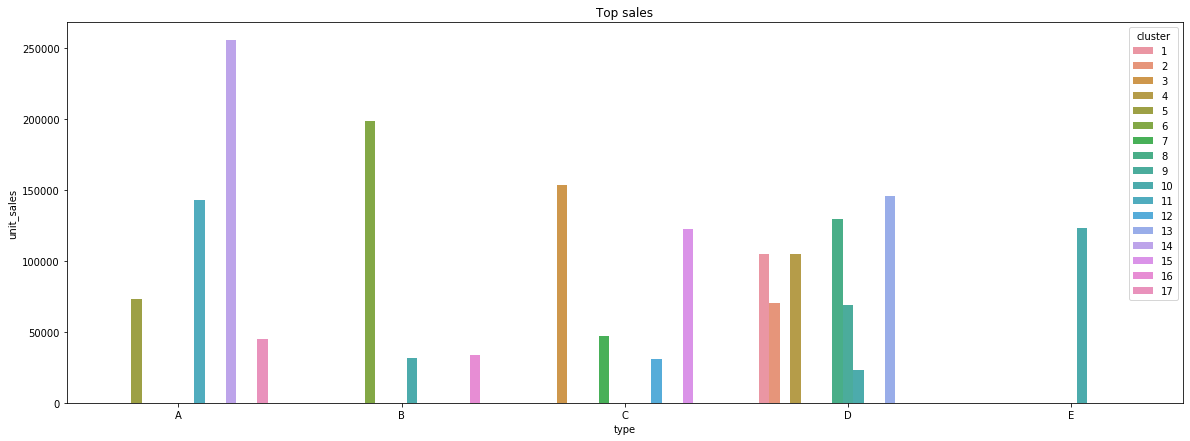

In [36]:
## Plot highest sales per type,cluster.
plt.figure(figsize=(20,7))
plt.title('Top sales')
sns.barplot(x=top_sales['type'],y='unit_sales', hue = top_sales['cluster'] ,data=top_sales)

In [0]:
## 2) What are the top 10 selling items in this cluster?

In [0]:
## Prepare a list with top clusters.
top_clusters = [14,6,3,13,10]

In [0]:
## Get sum of unit sales based on cluster and item_id.
aggr_item_cluster = dataframe3.groupby(['cluster', 'item_id']).agg({'unit_sales' : 'sum'})
## Reset the index.
aggr_item_cluster = aggr_item_cluster.reset_index()
## Create empty dataframe.
aggr_item_cluster_top10 = pd.DataFrame()

In [0]:
## Get top 10 unit sales items per cluster.
for i in top_clusters:
    aggr_item_cluster_top10 = aggr_item_cluster_top10.append(aggr_item_cluster[aggr_item_cluster['cluster'] == i].nlargest(10, ['unit_sales']))

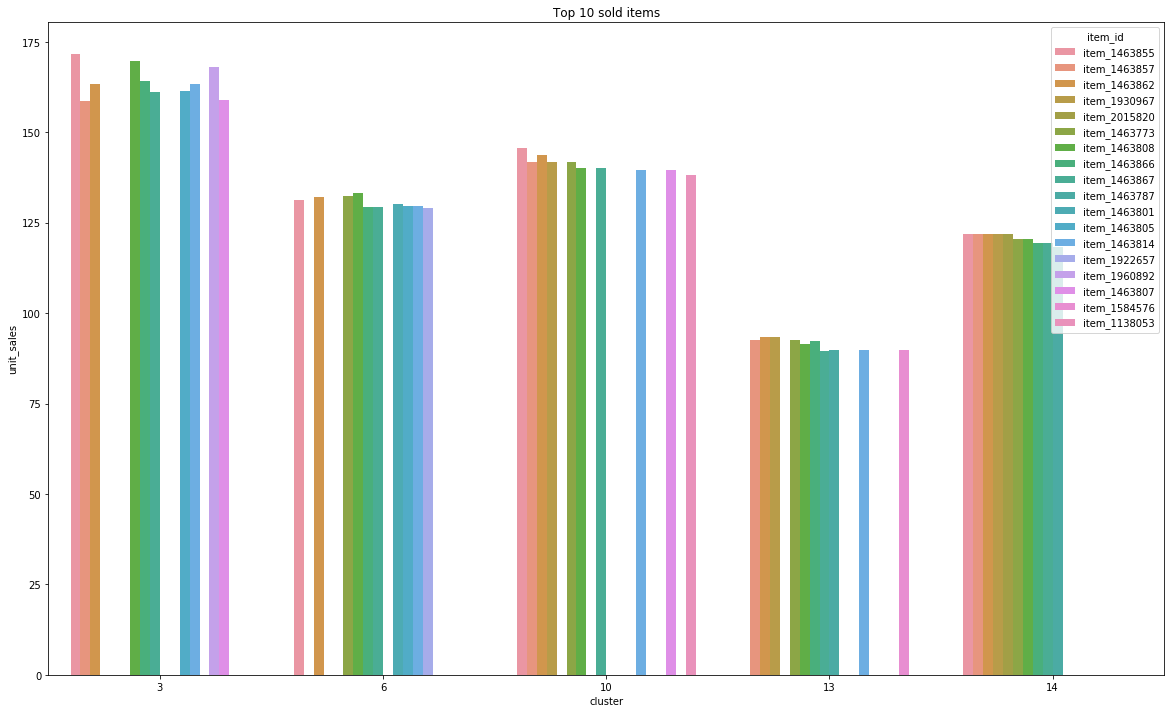

In [39]:
## Plot top 10 unit sales items per cluster.
plt.figure(figsize=(20,12))
plt.title('Top 10 sold items')
sns.barplot(x='cluster',y='unit_sales', hue = 'item_id' ,data=aggr_item_cluster_top10, orient= 'v')

In [40]:
## Check first 5 reocrds of aggr_item_cluster_top10.
aggr_item_cluster_top10.head()

,cluster,item_id,unit_sales
41382,14,item_1463855,121.904546
41383,14,item_1463857,121.904546
41386,14,item_1463862,121.904546
41956,14,item_1930967,121.904546
42428,14,item_2015820,121.904546


In [0]:
## 3) What is the rate of purchase per week for these items?

In [0]:
## Copy dataframe3 to dataframe.
dataframe = dataframe3.copy()

In [46]:
## Check first 5 records of dataframe.
dataframe.head()

,id,unit_sales,date,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,0,1.085583,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0
1,1,1.085583,2019-01-01,location_25,item_103665,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
2,2,1.085583,2019-01-01,location_25,item_105574,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0
3,3,1.085583,2019-01-01,location_25,item_105857,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1092,0
4,4,1.085583,2019-01-01,location_25,item_106716,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1032,0


In [0]:
## Extract day,month,week,year from date and add to dataframe.
dataframe['date'] = pd.to_datetime(dataframe['date'], format='%Y.%m.%d')
dataframe['year'] = dataframe['date'].dt.year
dataframe['month'] = dataframe['date'].dt.month
dataframe['week'] = dataframe['date'].dt.week
dataframe['day'] = dataframe['date'].dt.day

In [48]:
## Check last 5 records of dataframe.
dataframe[['year','month','week','day']].tail()

,year,month,week,day
1482290,2019,1,3,15
1482291,2019,1,3,15
1482292,2019,1,3,15
1482293,2019,1,3,15
1482294,2019,1,3,15


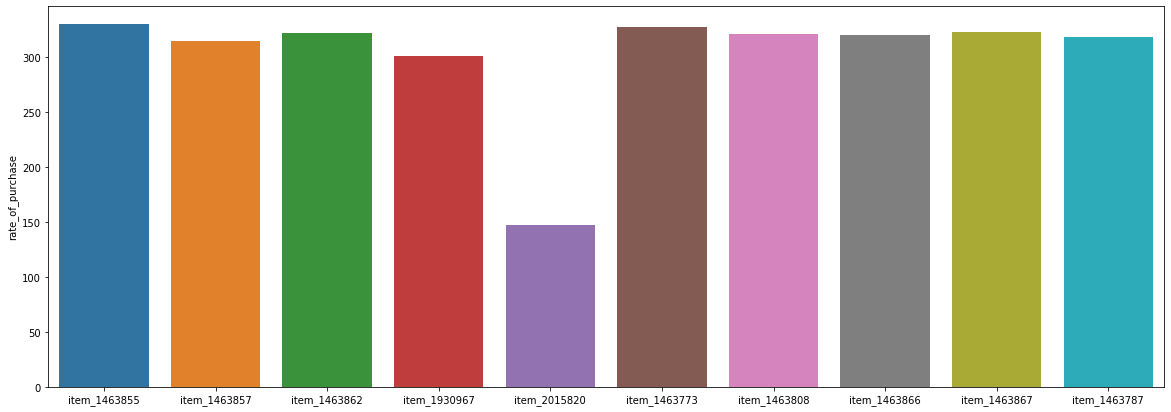

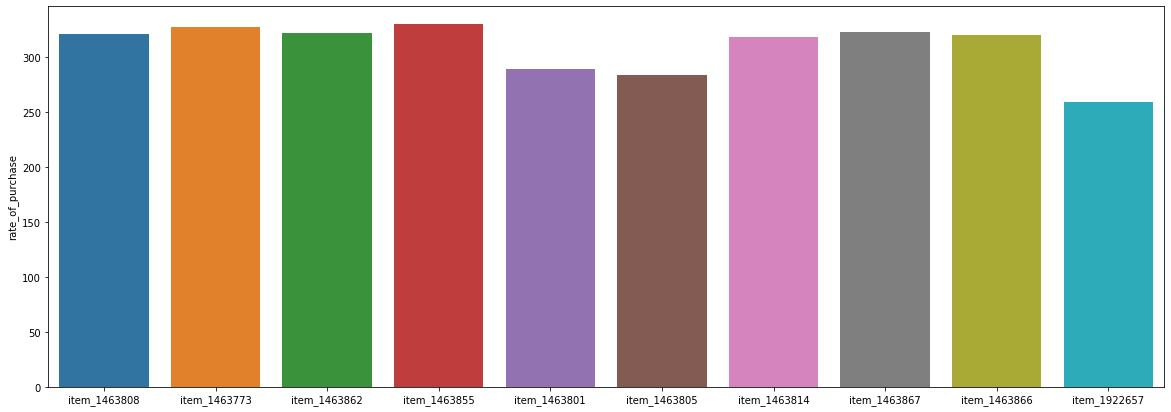

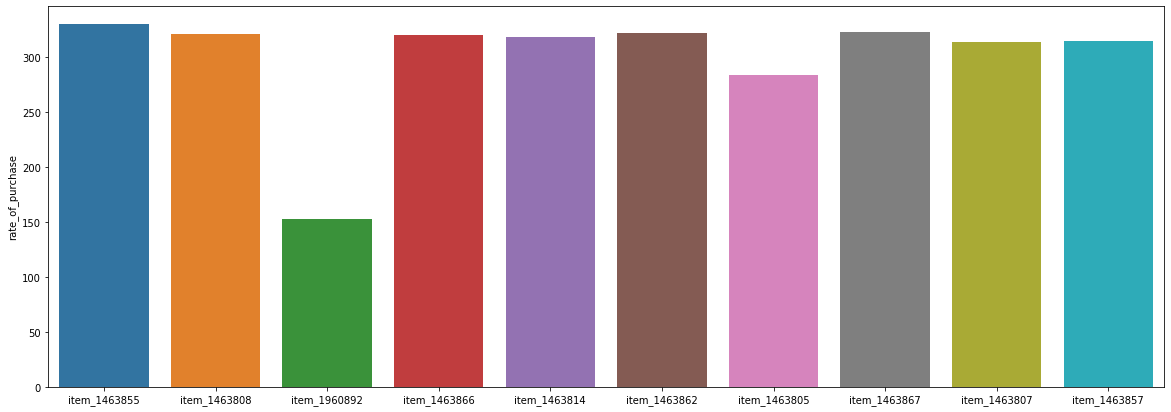

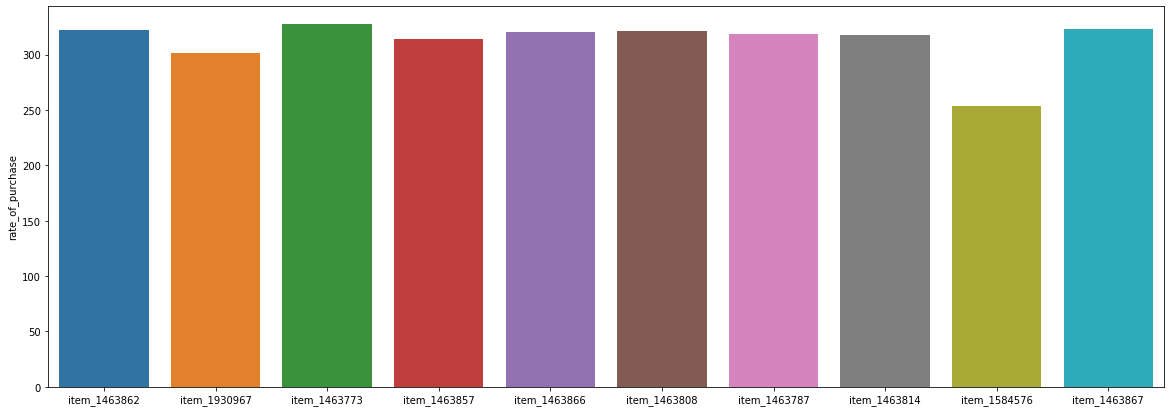

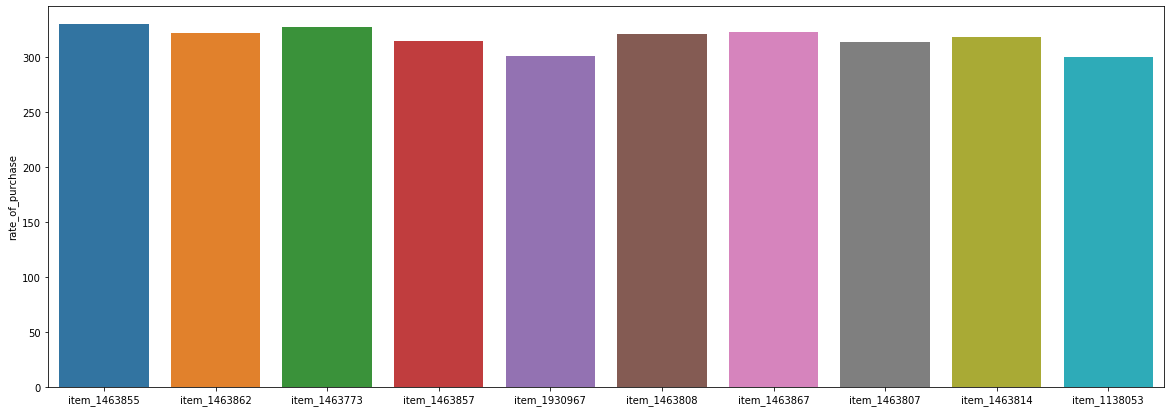

In [49]:
## Plot rate of purchase per week.
for cluster in top_clusters:
    ## Get item list from top 10 clusters.
    p = aggr_item_cluster_top10[aggr_item_cluster_top10['cluster']  == cluster]['item_id']
    ## Create empty dataframe.
    rpw = pd.DataFrame()
    for i in p:
      if dataframe['item_id'].eq(i).any():
        temp = pd.DataFrame({'rate_of_purchase' : dataframe[dataframe['item_id'].eq(i)]['unit_sales'].sum()/4}, index = [i])
        rpw = pd.concat([rpw, temp])
    plt.figure(figsize=(20,7))
    sns.barplot(x=rpw.index,y='rate_of_purchase', data=rpw)